## Load packages

In [130]:
%load_ext autoreload
%autoreload 2

from nclustRL.trainer import Trainer
from nclustRL.configs.default_configs import PPO_PBT, DEFAULT_CONFIG
from nclustRL.utils.helper import precision_round
from ray.rllib.agents.ppo import PPOTrainer
from nclustenv.configs import biclustering, triclustering
from nclustRL.configs.save import TrainerConfig
from ray.tune import ExperimentAnalysis, uniform
from ray.tune.suggest.bayesopt import BayesOptSearch

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- train
    - Train basic v2 (done)
    - Hyperparam tune basic_v2 (500 it) (done)
    - train again with new params (done)
        - test trained (done)
    - Hyperparam tune basic_v2 without reward shaping (500 it) (done)
    - train again with new params (running)
        - test trained (running)
    


- Plot
    - basic v2 vs tunned v2 with baseline
    - basic v3 with baseline
    - hyperparam tunes

Compare all pre and pos training test scores 

## v2 Shaped Reward

### Hyperparam tune basic_v2

#### Inicialize Trainer

In [2]:
config = DEFAULT_CONFIG.copy()
config['env_config'] = biclustering.binary.basic_v2

trainer = Trainer(
    trainer=PPOTrainer,
    env='BiclusterEnv-v0',
    save_dir='/home/pgcotovio/repos/nclustRL/Exp/test_framework2',
    name='basic_config_v2_hypertune',
    config=config
)

2022-03-08 19:12:57,483	INFO ppo.py:166 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
(RolloutWorker pid=1676818) 2022-03-08 19:13:01,503	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=1676819) 2022-03-08 19:13:01,568	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=1676826) 2022-03-08 19:13:01,631	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=1676815) 2022-03-08 19:13:01,769	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=1676819) 2022-03-08 19:13:06,007	INFO rollout_worker.py:1705 -- Validating sub-env at vector index=0 ... (ok)
(RolloutWorker pid=1676819) 2022-03-08 19:13:06,007	DEBUG rollout_worker.py:1534 -- Creating policy for default_policy
(RolloutWorker pid=

#### Tune agent

In [3]:
best_checkpoint = trainer.train(
    num_samples=8, 
    scheduler=PPO_PBT,
    stop_iters=500,
)
best_checkpoint

2022-03-08 23:33:34,988	WARNING worker.py:1245 -- A worker died or was killed while executing a task by an unexpected system error. To troubleshoot the problem, check the logs for the dead worker. RayTask ID: ffffffffffffffffd715c3caf9e9bff10812760d01000000 Worker ID: 95fcb97face687f350c5df206bd4b9796ee54fdea0296ee42ffbea7f Node ID: 55996604780d5c204f46219fe26df8f24e4bbe77cb9e563fa2724bba Worker IP address: 10.20.0.204 Worker port: 46729 Worker PID: 1676819
2022-03-08 23:33:35,060	WARNING worker.py:1245 -- A worker died or was killed while executing a task by an unexpected system error. To troubleshoot the problem, check the logs for the dead worker. RayTask ID: ffffffffffffffff1a442c5a7a9513a11e685e2f01000000 Worker ID: 6c0b11e358c19518e92161a0f04b2fb6d9b13293bee5de163a79894f Node ID: 55996604780d5c204f46219fe26df8f24e4bbe77cb9e563fa2724bba Worker IP address: 10.20.0.204 Worker port: 41927 Worker PID: 1676818
2022-03-08 23:33:35,144	ERROR tune.py:622 -- Trials did not complete: [PPO_B

{'config': {'num_workers': 4,
  'create_env_on_driver': False,
  'num_envs_per_worker': 1,
  'batch_mode': 'truncate_episodes',
  'gamma': 0.99,
  'use_critic': True,
  'use_gae': True,
  'lambda': 0.96,
  'kl_coeff': 0.288,
  'rollout_fragment_length': 256,
  'train_batch_size': 655,
  'sgd_minibatch_size': 122,
  'shuffle_sequences': True,
  'num_sgd_iter': 19,
  'lr': 5e-05,
  'lr_schedule': None,
  'vf_loss_coeff': 1.44,
  'entropy_coeff': 0.0,
  'entropy_coeff_schedule': None,
  'clip_param': 0.432,
  'vf_clip_param': 14.399999999999999,
  'grad_clip': None,
  'kl_target': 0.0064,
  'optimizer': {},
  'horizon': None,
  'soft_horizon': False,
  'no_done_at_end': False,
  'env': 'BiclusterEnv-v0',
  'observation_space': None,
  'action_space': None,
  'env_config': {'shape': [[6, 6], [6, 6]],
   'n': 1,
   'clusters': [1, 1],
   'dataset_settings': {'dstype': {'value': 'Symbolic'},
    'patterns': {'value': [['CONSTANT', 'CONSTANT']]},
    'symbols': {'value': [-1, 1]},
    'bktype

2022-03-08 23:33:35,265	WARNING worker.py:1245 -- A worker died or was killed while executing a task by an unexpected system error. To troubleshoot the problem, check the logs for the dead worker. RayTask ID: ffffffffffffffff0227e69b475a9eb7302a09c201000000 Worker ID: 205853743bddaf2571b11b226a09c991beec572ced9f5cbd9366952a Node ID: 55996604780d5c204f46219fe26df8f24e4bbe77cb9e563fa2724bba Worker IP address: 10.20.0.204 Worker port: 36531 Worker PID: 1676815
2022-03-08 23:33:35,265	WARNING worker.py:1245 -- A worker died or was killed while executing a task by an unexpected system error. To troubleshoot the problem, check the logs for the dead worker. RayTask ID: ffffffffffffffff23224c104535b3eed95f72f101000000 Worker ID: 690771c631a8827d872df4d7a8e3a14ccbcdcf47bdad9da1fb655c84 Node ID: 55996604780d5c204f46219fe26df8f24e4bbe77cb9e563fa2724bba Worker IP address: 10.20.0.204 Worker port: 37557 Worker PID: 1676826


#### Get Report

In [39]:
# get report config

analysis = ExperimentAnalysis('/home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_config_v2_hypertune/sample_0/PPO_2022-03-08_19-13-14')

analysis.results_df

2022-03-15 22:55:20,526	INFO experiment_analysis.py:673 -- No `self.trials`. Drawing logdirs from checkpoint file. This may result in some information that is out of sync, as checkpointing is periodic.


episode_reward_max  episode_reward_min  episode_reward_mean  \
trial_id                                                                   
cd6a3_00000            2.814000           -1.750000            -0.916221   
cd6a3_00007           -1.400000           -1.636364            -1.533144   
cd6a3_00001            2.984000           -1.666667            -0.632934   
cd6a3_00006           -1.333333           -1.600000            -1.477904   
cd6a3_00005           -1.333333           -1.666667            -1.472348   
cd6a3_00004           -1.333333           -1.818182            -1.620202   
cd6a3_00003            2.974000           -1.727273            -0.353490   
cd6a3_00002           -1.333333           -1.818182            -1.583586   

             episode_len_mean  episodes_this_iter  num_healthy_workers  \
trial_id                                                                 
cd6a3_00000        914.230769                   0                    4   
cd6a3_00007       1001.000000                   0                    4   
cd6a3_00001        865.357143                   5                    4   
cd6a3_00006       1001.000000                   0                    4   
cd6a3_00005       1001.000000                   0                    4   
cd6a3_00004       1001.000000                   4                    4   
cd6a3_00003        787.000000                   0                    4   
cd6a3_00002       1001.000000                   4                    4   

             timesteps_total  timesteps_this_iter  agent_timesteps_total  \
trial_id                                                                   
cd6a3_00000           117240                    0                 117240   
cd6a3_00007           149472                    0                 149472   
cd6a3_00001           133776                    0                 133776   
cd6a3_00006           144952                    0                 144952   
cd6a3_00005           135744                    0                 135744   
cd6a3_00004           122728                    0                 122728   
cd6a3_00003           137712                    0                 137712   
cd6a3_00002           126256                    0                 126256   

              done  ...  info.learner.default_policy.learner_stats.kl  \
trial_id            ...                                                 
cd6a3_00000  False  ...                                      0.004712   
cd6a3_00007  False  ...                                      0.023853   
cd6a3_00001  False  ...                                      0.008617   
cd6a3_00006  False  ...                                      0.013828   
cd6a3_00005  False  ...                                      0.009497   
cd6a3_00004  False  ...                                      0.018965   
cd6a3_00003  False  ...                                      0.024227   
cd6a3_00002  False  ...                                      0.015725   

             info.learner.default_policy.learner_stats.entropy  \
trial_id                                                         
cd6a3_00000                                          16.667426   
cd6a3_00007                                          12.915991   
cd6a3_00001                                          13.219076   
cd6a3_00006                                          13.013030   
cd6a3_00005                                          13.675836   
cd6a3_00004                                          15.620097   
cd6a3_00003                                          13.747019   
cd6a3_00002                                          15.986398   

            info.learner.default_policy.learner_stats.entropy_coeff  \
trial_id                                                              
cd6a3_00000                                                0.0        
cd6a3_00007                                                0.0        
cd6a3_00001                                                0.0        
cd6

In [5]:
best_trial = analysis.get_best_trial(metric='episode_reward_mean', mode='max')
print('Best Trial: ', best_trial)

# best checkpoint

analysis.get_best_checkpoint(trial=best_trial, metric='episode_reward_mean', mode='max')

Best Trial:  PPO_BiclusterEnv-v0_cd6a3_00003


'/home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_config_v2_hypertune/sample_0/PPO_2022-03-08_19-13-14/PPO_BiclusterEnv-v0_cd6a3_00003_3_2022-03-08_19-17-55/checkpoint_000030/checkpoint-30'

In [9]:

# get best config

tunned_config = analysis.get_best_config(metric='episode_reward_mean', mode='max', scope='all')

configs = TrainerConfig('tunned_configs', '/home/pgcotovio/repos/nclustRL/Exp/test_framework2')
configs.save(tunned_config)

tunned_config == configs.obj

{'num_workers': 4,
 'create_env_on_driver': False,
 'num_envs_per_worker': 1,
 'batch_mode': 'truncate_episodes',
 'gamma': 0.99,
 'use_critic': True,
 'use_gae': True,
 'lambda': 0.6400000000000001,
 'kl_coeff': 0.192,
 'rollout_fragment_length': 256,
 'train_batch_size': 982,
 'sgd_minibatch_size': 122,
 'shuffle_sequences': True,
 'num_sgd_iter': 19,
 'lr': 5e-05,
 'lr_schedule': None,
 'vf_loss_coeff': 0.96,
 'entropy_coeff': 0.0,
 'entropy_coeff_schedule': None,
 'clip_param': 0.432,
 'vf_clip_param': 14.399999999999999,
 'grad_clip': None,
 'kl_target': 0.0096,
 'optimizer': {},
 'horizon': None,
 'soft_horizon': False,
 'no_done_at_end': False,
 'env': 'BiclusterEnv-v0',
 'observation_space': None,
 'action_space': None,
 'env_config': {'shape': [[6, 6], [6, 6]],
  'n': 1,
  'clusters': [1, 1],
  'dataset_settings': {'dstype': {'value': 'Symbolic'},
   'patterns': {'value': [['CONSTANT', 'CONSTANT']]},
   'symbols': {'value': [-1, 1]},
   'bktype': {'value': 'UNIFORM'},
   'clus

E0308 23:39:39.764528120 1987670 backup_poller.cc:134]       Run client channel backup poller: {"created":"@1646782779.764462976","description":"pollset_work","file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":320,"referenced_errors":[{"created":"@1646782779.764450883","description":"Bad file descriptor","errno":9,"file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":950,"os_error":"Bad file descriptor","syscall":"epoll_wait"}]}


#### Plot

In [ ]:
analysis = ExperimentAnalysis('/home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_config_v2_hypertune/sample_0/PPO_2022-03-08_19-13-14')

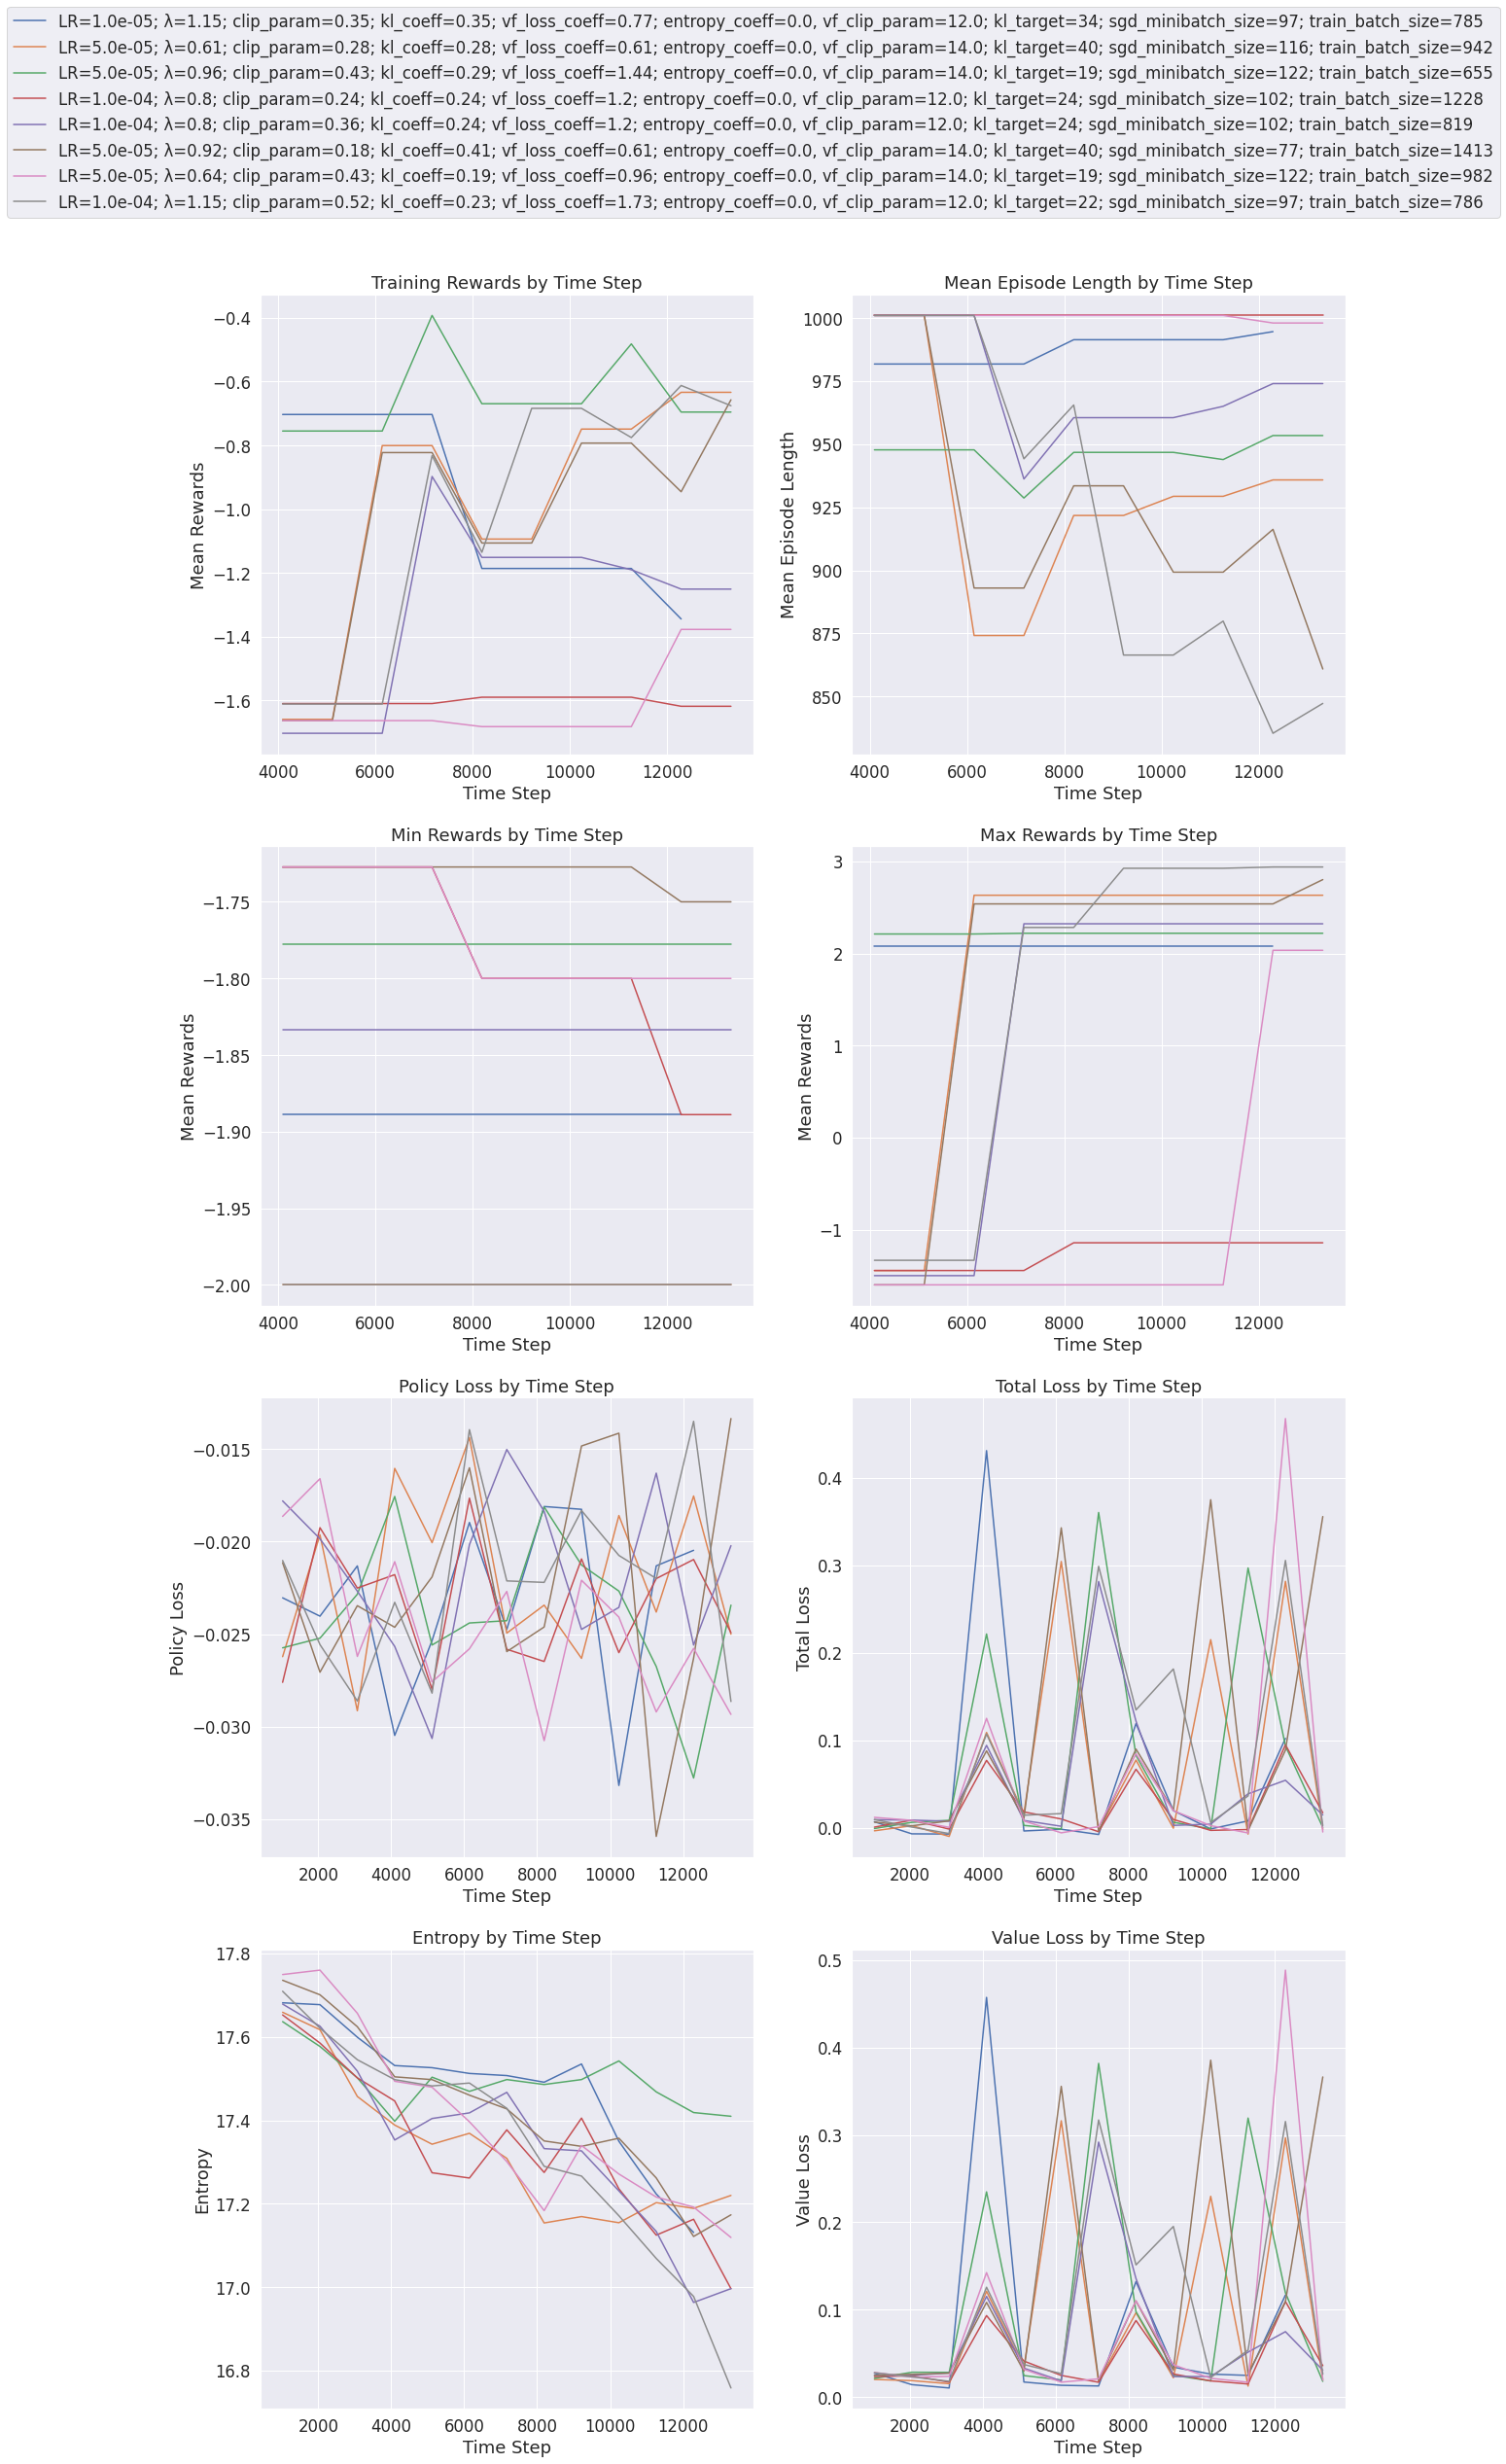

In [152]:

def plot_hypertune(analysis):

        labels = []
        fig, ax = plt.subplots(4, 2, figsize=(20, 40))
        for i, trial in enumerate(analysis.trials):

                

                data = pd.read_csv(trial.logdir + '/progress.csv', on_bad_lines='skip')
                
                # Get labels for legend
                lr = format(analysis.trials[i].config['lr'],'.1e')
                lambda_ = round(analysis.trials[i].config['lambda'], 2)
                clip_param = round(analysis.trials[i].config['clip_param'], 2)
                kl_coeff = round(analysis.trials[i].config['kl_coeff'], 2)
                vf_loss_coeff = round(analysis.trials[i].config['vf_loss_coeff'], 2)
                entropy_coeff = round(analysis.trials[i].config['entropy_coeff'], 2)
                vf_clip_param = round(analysis.trials[i].config['vf_clip_param'], 0)
                kl_target = round(analysis.trials[i].config['num_sgd_iter'], 0)
                sgd_minibatch_size = round(analysis.trials[i].config['sgd_minibatch_size'], 0)
                train_batch_size = round(analysis.trials[i].config['train_batch_size'], 0)

                labels.append(
                        'LR={}; \u03BB={}; clip_param={}; kl_coeff={}; vf_loss_coeff={}; entropy_coeff={}, vf_clip_param={}; kl_target={}; sgd_minibatch_size={}; train_batch_size={}'.format(
                                lr, lambda_, clip_param, kl_coeff, vf_loss_coeff, entropy_coeff, vf_clip_param, kl_target, sgd_minibatch_size, train_batch_size)
                )

                sns.lineplot(data=data, x='timesteps_total', y='episode_reward_mean', ci='sd', ax=ax[0, 0])

                sns.lineplot(data=data, x='timesteps_total', y='episode_len_mean', ci='sd', ax=ax[0, 1])

                sns.lineplot(data=data, x='timesteps_total', y='episode_reward_min', ci='sd', ax=ax[1, 0])

                sns.lineplot(data=data, x='timesteps_total', y='episode_reward_max', ci='sd', ax=ax[1, 1])

                sns.lineplot(data=data, x='timesteps_total', y='info/learner/default_policy/learner_stats/total_loss', ci='sd', ax=ax[2, 1])

                sns.lineplot(data=data, x='timesteps_total', y='info/learner/default_policy/learner_stats/policy_loss', ci='sd', ax=ax[2, 0])

                sns.lineplot(data=data, x='timesteps_total', y='info/learner/default_policy/learner_stats/vf_loss', ci='sd', ax=ax[3, 1])

                sns.lineplot(data=data, x='timesteps_total', y='info/learner/default_policy/learner_stats/entropy', ci='sd', ax=ax[3, 0])




        ax[0, 0].set_ylabel('Mean Rewards')
        ax[0, 0].set_title('Training Rewards by Time Step')
        ax[0, 0].legend(labels=labels, loc='lower center',
                ncol=1, bbox_to_anchor=[1, 1.15])
        ax[0, 0].set_xlabel('Time Step')
        ax[0, 1].set_title('Mean Episode Length by Time Step')
        ax[0, 1].set_ylabel('Mean Episode Length')
        ax[0, 1].set_xlabel('Time Step')
        ax[1, 0].set_title('Min Rewards by Time Step')
        ax[1, 0].set_ylabel('Mean Rewards')
        ax[1, 0].set_xlabel('Time Step')
        ax[1, 1].set_title('Max Rewards by Time Step')
        ax[1, 1].set_ylabel('Mean Rewards')
        ax[1, 1].set_xlabel('Time Step')
        ax[2, 1].set_title('Total Loss by Time Step')
        ax[2, 1].set_ylabel('Total Loss')
        ax[2, 1].set_xlabel('Time Step')
        ax[2, 0].set_title('Policy Loss by Time Step')
        ax[2, 0].set_ylabel('Policy Loss')
        ax[2, 0].set_xlabel('Time Step')
        ax[3, 0].set_title('Entropy by Time Step')
        ax[3, 0].set_ylabel('Entropy')
        ax[3, 0].set_xlabel('Time Step')
        ax[3, 1].set_title('Value Loss by Time Step')
        ax[3, 1].set_ylabel('Value Loss')
        ax[3, 1].set_xlabel('Time Step')
        plt.show()

plot_hypertune(analysis=analysis)

### Train basic_v2 (untunned)

In [2]:
config = DEFAULT_CONFIG.copy()
config['env_config'] = biclustering.binary.basic_v2

trainer_basic_v2_unttuned = Trainer(
    trainer=PPOTrainer,
    env='BiclusterEnv-v0',
    save_dir='/home/pedro.cotovio/Repos/nclustRL/Exp/test_framework2',
    name='basic_v2_config',
    config=config
)

2022-03-09 18:17:08,120	INFO ppo.py:166 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
(RolloutWorker pid=99980) 2022-03-09 18:17:12,125	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=99990) 2022-03-09 18:17:12,186	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=99989) 2022-03-09 18:17:12,210	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=99986) 2022-03-09 18:17:12,215	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=99980) 2022-03-09 18:17:16,690	INFO rollout_worker.py:1705 -- Validating sub-env at vector index=0 ... (ok)
(RolloutWorker pid=99980) 2022-03-09 18:17:16,690	DEBUG rollout_worker.py:1534 -- Creating policy for default_policy
(RolloutWorker pid=99990) 2022-

#### Test random agent in basic_v2

In [3]:
trainer_basic_v2_unttuned.test(10)

Episode 1 of 10 done.
Episode 2 of 10 done.
Episode 3 of 10 done.
Episode 4 of 10 done.
Episode 5 of 10 done.
Episode 6 of 10 done.
Episode 7 of 10 done.
Episode 8 of 10 done.
Episode 9 of 10 done.
Episode 10 of 10 done.


(-1.900000000000001, 0.09999999999999995, 5.525888757999928)

#### train agent

In [6]:
best_checkpoint = trainer_basic_v2_unttuned.train(stop_iters=1000)
best_checkpoint

#### load and test trained agent

In [5]:
# load agent
trainer_basic_v2_unttuned.load('/home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_v2_config/sample_0/PPO_2022-03-06_14-18-50/PPO_BiclusterEnv-v0_58725_00000_0_2022-03-06_14-18-50/checkpoint_000270/checkpoint-270')

# test agent
trainer_basic_v2_unttuned.test(10)

2022-03-09 18:24:37,386	INFO trainable.py:467 -- Restored on 10.20.0.204 from checkpoint: /home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_v2_config/sample_0/PPO_2022-03-06_14-18-50/PPO_BiclusterEnv-v0_58725_00000_0_2022-03-06_14-18-50/checkpoint_000270/checkpoint-270
2022-03-09 18:24:37,387	INFO trainable.py:475 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': 0, '_time_total': 8638.795632839203, '_episodes_total': 578}


Episode 1 of 10 done.


E0309 18:24:46.817591283  104963 backup_poller.cc:134]       Run client channel backup poller: {"created":"@1646850286.817553121","description":"pollset_work","file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":320,"referenced_errors":[{"created":"@1646850286.817549454","description":"Bad file descriptor","errno":9,"file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":950,"os_error":"Bad file descriptor","syscall":"epoll_wait"}]}


Episode 2 of 10 done.
Episode 3 of 10 done.
Episode 4 of 10 done.
Episode 5 of 10 done.
Episode 6 of 10 done.
Episode 7 of 10 done.
Episode 8 of 10 done.
Episode 9 of 10 done.
Episode 10 of 10 done.


(-1.9160714285714295, 0.0839285714285714, 5.528052786999979)

#### Plot

2022-03-16 01:24:52,508	INFO experiment_analysis.py:673 -- No `self.trials`. Drawing logdirs from checkpoint file. This may result in some information that is out of sync, as checkpointing is periodic.


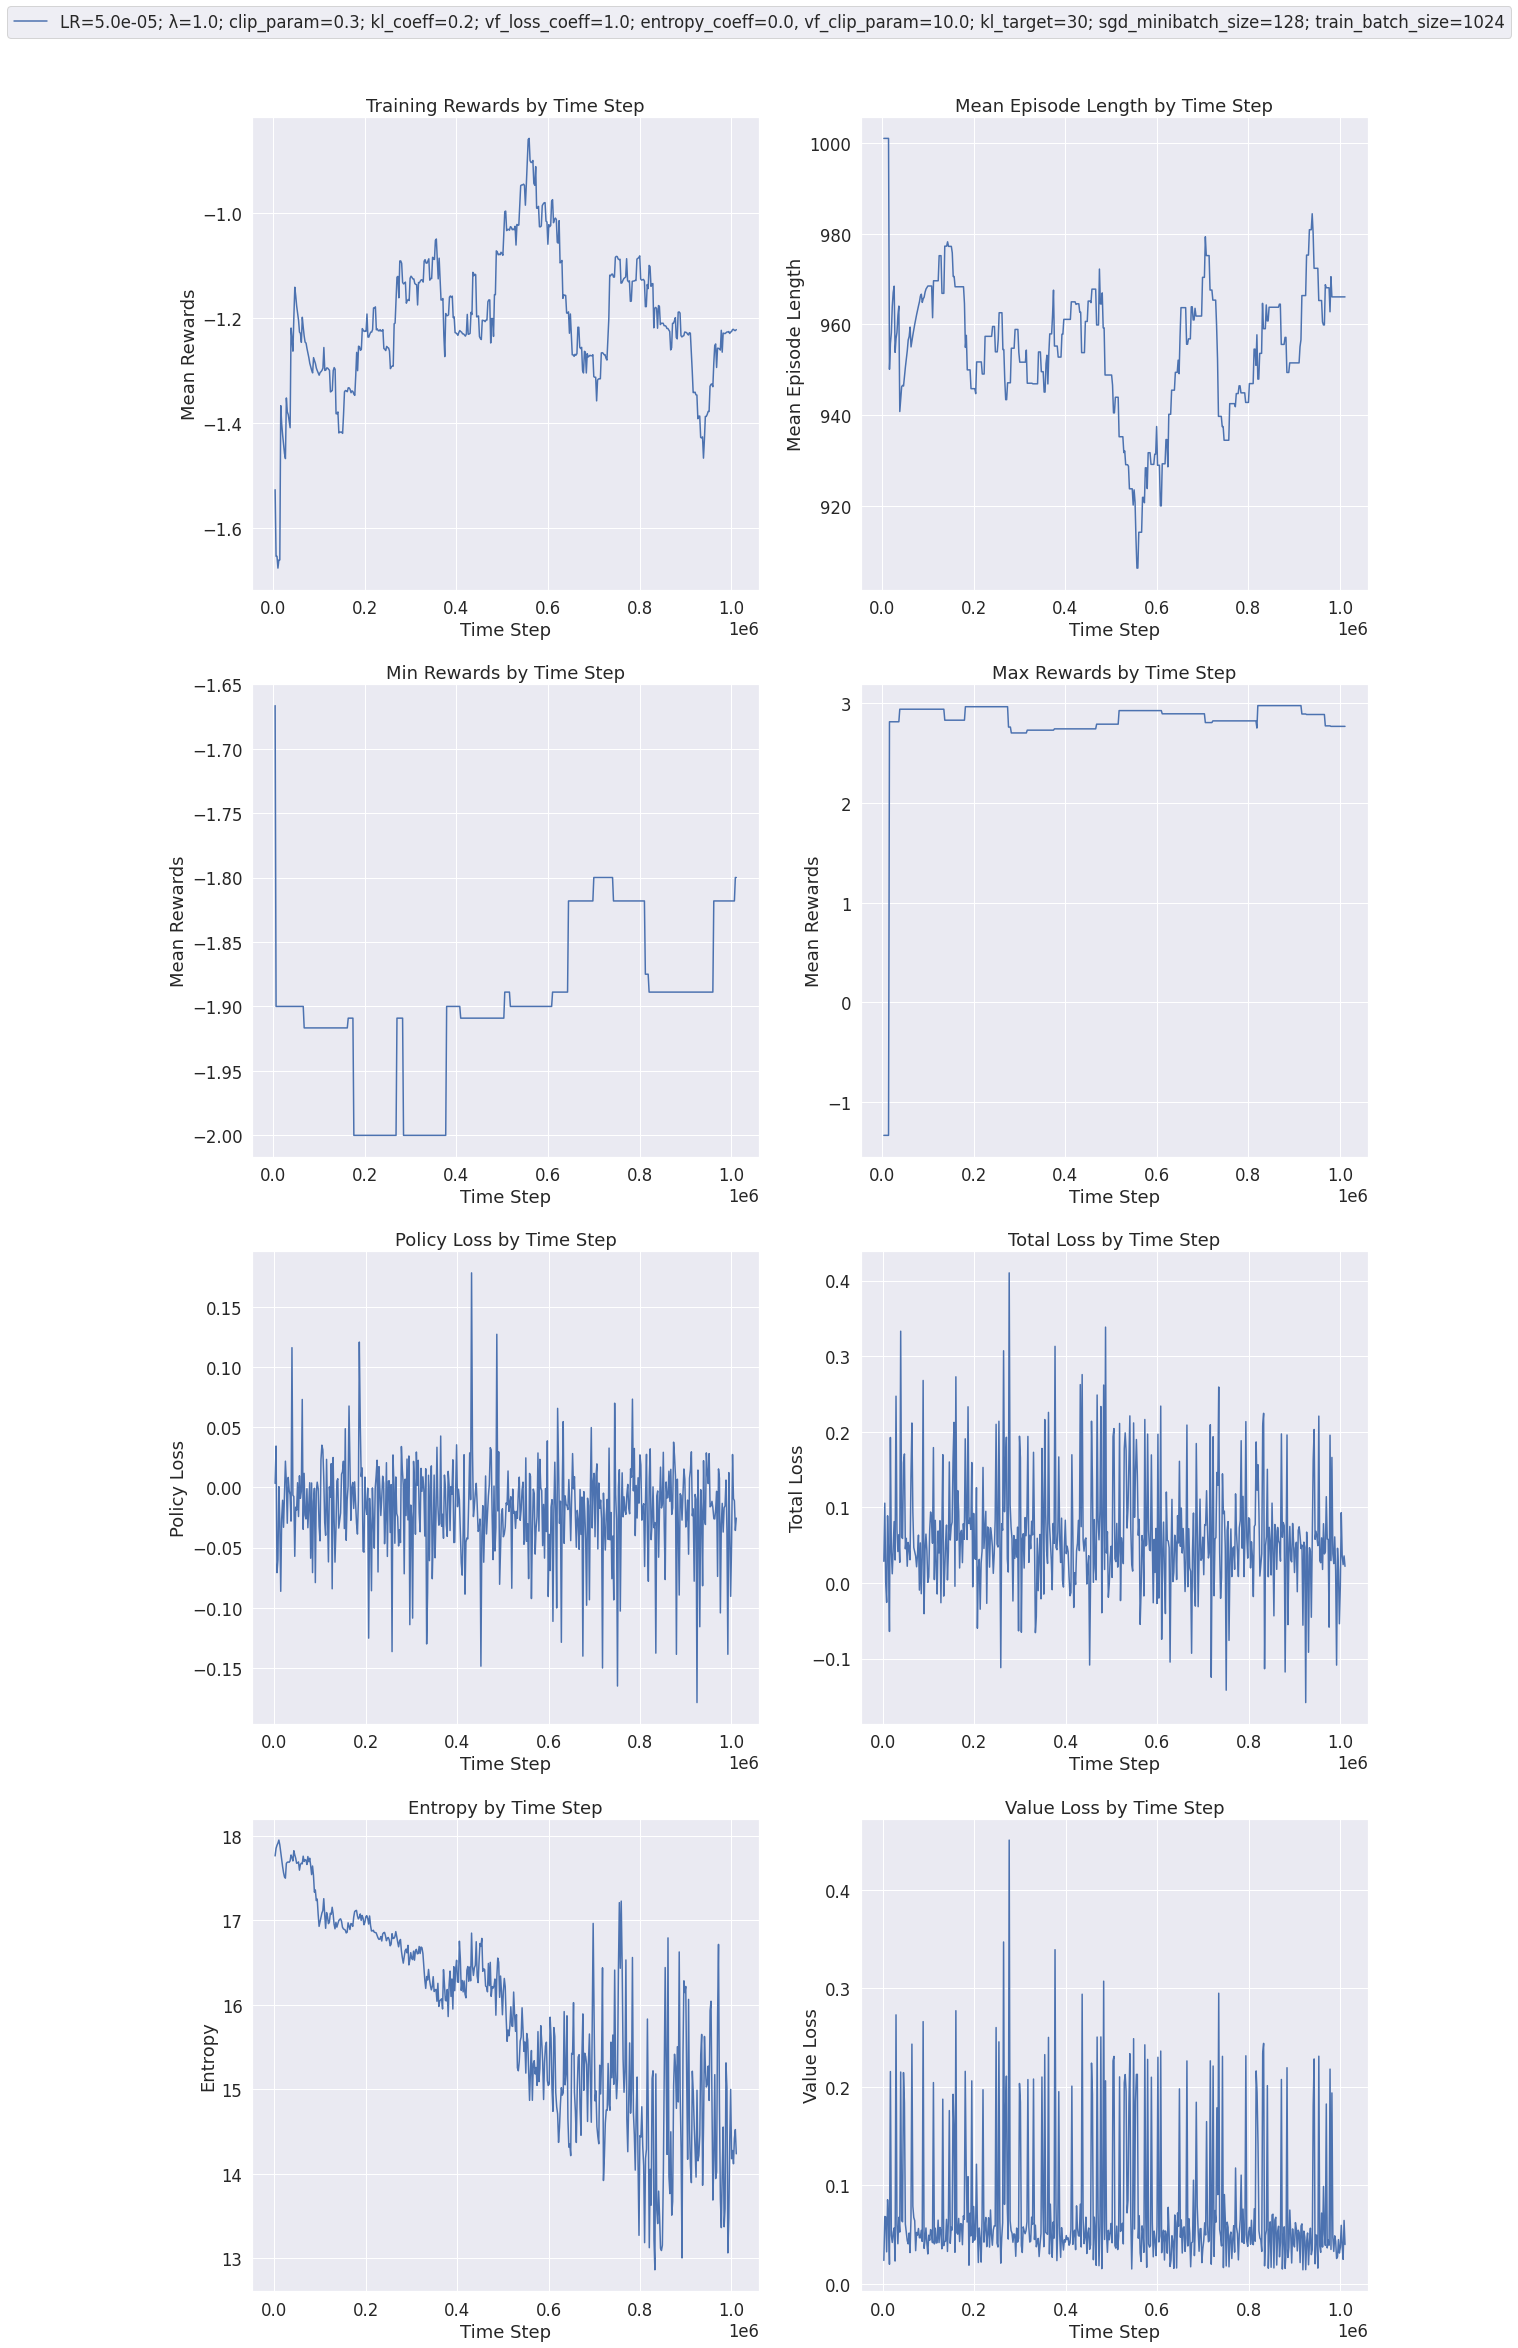

In [158]:
analysis_untunned_v2 = ExperimentAnalysis('/home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_v2_config/sample_0/PPO_2022-03-06_14-18-50')

plot_hypertune(analysis=analysis_untunned_v2)

### Train basic_v2 (tunned)

#### Train

In [2]:
# Inicilize

configs = TrainerConfig('tunned_configs', '/home/pgcotovio/repos/nclustRL/Exp/test_framework2')
tunned_config = configs.obj

trainer_basic_v2_tunned = Trainer(
    trainer=PPOTrainer,
    env='BiclusterEnv-v0',
    save_dir='/home/pgcotovio/repos/nclustRL/Exp/test_framework2',
    name='basic_v2_tunned_config',
    config=tunned_config
)

2022-03-09 18:26:38,303	WARNING ppo.py:143 -- `train_batch_size` (982) cannot be achieved with your other settings (num_workers=4 num_envs_per_worker=1 rollout_fragment_length=256)! Auto-adjusting `rollout_fragment_length` to 245.
2022-03-09 18:26:38,304	INFO ppo.py:166 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
(RolloutWorker pid=106096) 2022-03-09 18:26:42,295	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=106102) 2022-03-09 18:26:42,371	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=106098) 2022-03-09 18:26:42,540	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=106093) 2022-03-09 18:26:42,697	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=106096) 2022-03-09 18

In [3]:
# train
best_checkpoint = trainer_basic_v2_tunned.train(stop_iters=1000)
best_checkpoint['df']

2022-03-09 04:55:08,873	INFO tune.py:626 -- Total run time: 18725.09 seconds (18724.49 seconds for the tuning loop).
Sample 1: : 1sample [5:12:05, 18725.13s/sample, metric={'episode_reward_max': 2.679, 'episode_reward_min': -1.6666666666666676, 'episode_reward_mean': -1.4001847474747484, 'episode_len_mean': 994.2, 'episode_media': {}, 'episodes_this_iter': 3, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [-1.3636363636363646, -1.3636363636363646, -1.5000000000000009, -1.4166666666666674, -1.5454545454545463, -1.3636363636363646, -1.4166666666666674, -1.5000000000000009, -1.3636363636363646, -1.5833333333333341, -1.3636363636363646, -1.5833333333333341, -1.5000000000000009, -1.300000000000001, -1.5833333333333341, -1.5000000000000009, -1.3636363636363646, -1.3636363636363646, -1.3636363636363646, -1.3636363636363646, -1.5000000000000009, -1.3636363636363646, -1.5000000000000009, -1.6666666666666676, -1.

{'config': {'num_workers': 4,
  'create_env_on_driver': False,
  'num_envs_per_worker': 1,
  'batch_mode': 'truncate_episodes',
  'gamma': 0.99,
  'use_critic': True,
  'use_gae': True,
  'lambda': 0.6400000000000001,
  'kl_coeff': 0.192,
  'rollout_fragment_length': 256,
  'train_batch_size': 982,
  'sgd_minibatch_size': 122,
  'shuffle_sequences': True,
  'num_sgd_iter': 19,
  'lr': 5e-05,
  'lr_schedule': None,
  'vf_loss_coeff': 0.96,
  'entropy_coeff': 0.0,
  'entropy_coeff_schedule': None,
  'clip_param': 0.432,
  'vf_clip_param': 14.399999999999999,
  'grad_clip': None,
  'kl_target': 0.0096,
  'optimizer': {},
  'horizon': None,
  'soft_horizon': False,
  'no_done_at_end': False,
  'env': 'BiclusterEnv-v0',
  'observation_space': None,
  'action_space': None,
  'env_config': {'shape': [[6, 6], [6, 6]],
   'n': 1,
   'clusters': [1, 1],
   'dataset_settings': {'dstype': {'value': 'Symbolic'},
    'patterns': {'value': [['CONSTANT', 'CONSTANT']]},
    'symbols': {'value': [-1, 1]

E0309 05:04:43.857621560 2335227 backup_poller.cc:134]       Run client channel backup poller: {"created":"@1646802283.857580873","description":"pollset_work","file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":320,"referenced_errors":[{"created":"@1646802283.857573900","description":"Bad file descriptor","errno":9,"file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":950,"os_error":"Bad file descriptor","syscall":"epoll_wait"}]}
E0309 05:09:03.942579142 2337586 backup_poller.cc:134]       Run client channel backup poller: {"created":"@1646802543.942511494","description":"pollset_work","file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":320,"referenced_errors":[{"created":"@1646802543.942501275","description":"Bad file descriptor","errno":9,"file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":950,"os_error":"Bad file descriptor","syscall":"epoll_wait"}]}
E0309 05:33:44.319683530 2351328 backup_poller.cc:134]       Run client channel backup poller: {"created

In [7]:
best_checkpoint['df']

episode_reward_max  episode_reward_min  episode_reward_mean  \
0               2.359           -1.666667            -0.797695   

   episode_len_mean  episodes_this_iter  num_healthy_workers  timesteps_total  \
0             929.0                   1                    4             7840   

   timesteps_this_iter  agent_timesteps_total   done  ...  \
0                    0                   7840  False  ...   

   config/shuffle_sequences  config/soft_horizon config/synchronize_filters  \
0                      True                False                       True   

  config/timesteps_per_iteration config/train_batch_size  config/use_critic  \
0                              0                     982               True   

   config/use_gae  config/vf_clip_param  config/vf_loss_coeff  \
0            True                  14.4                  0.96   

                                              logdir  
0  /home/pgcotovio/repos/nclustRL/Exp/test_framew...  

[1 rows x 125 columns]

In [9]:
best_checkpoint['path']

'/home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_v2_tunned_config/sample_0/PPO_2022-03-08_23-43-03/PPO_BiclusterEnv-v0_7f365_00000_0_2022-03-08_23-43-03/checkpoint_000060/checkpoint-60'

In [4]:
# load and test
trainer_basic_v2_tunned.load('/home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_v2_tunned_config/sample_0/PPO_2022-03-08_23-43-03/PPO_BiclusterEnv-v0_7f365_00000_0_2022-03-08_23-43-03/checkpoint_000060/checkpoint-60')

trainer_basic_v2_tunned.test(10)

2022-03-09 18:28:09,743	INFO trainable.py:467 -- Restored on 10.20.0.204 from checkpoint: /home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_v2_tunned_config/sample_0/PPO_2022-03-08_23-43-03/PPO_BiclusterEnv-v0_7f365_00000_0_2022-03-08_23-43-03/checkpoint_000060/checkpoint-60
2022-03-09 18:28:09,744	INFO trainable.py:475 -- Current state after restoring: {'_iteration': 60, '_timesteps_total': 0, '_time_total': 1072.0786392688751, '_episodes_total': 124}


Episode 1 of 10 done.
Episode 2 of 10 done.
Episode 3 of 10 done.
Episode 4 of 10 done.
Episode 5 of 10 done.
Episode 6 of 10 done.
Episode 7 of 10 done.
Episode 8 of 10 done.
Episode 9 of 10 done.
Episode 10 of 10 done.


(-1.8464285714285722, 0.15357142857142855, 5.4613246079999955)

E0309 19:52:43.908705212  157933 backup_poller.cc:134]       Run client channel backup poller: {"created":"@1646855563.908656960","description":"pollset_work","file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":320,"referenced_errors":[{"created":"@1646855563.908653093","description":"Bad file descriptor","errno":9,"file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":950,"os_error":"Bad file descriptor","syscall":"epoll_wait"}]}
E0309 20:06:48.965770920  166416 backup_poller.cc:134]       Run client channel backup poller: {"created":"@1646856408.965718972","description":"pollset_work","file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":320,"referenced_errors":[{"created":"@1646856408.965714363","description":"Bad file descriptor","errno":9,"file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":950,"os_error":"Bad file descriptor","syscall":"epoll_wait"}]}
E0309 20:26:19.077712065  178015 backup_poller.cc:134]       Run client channel backup poller: {"created

#### Plot

2022-03-16 01:27:42,899	INFO experiment_analysis.py:673 -- No `self.trials`. Drawing logdirs from checkpoint file. This may result in some information that is out of sync, as checkpointing is periodic.


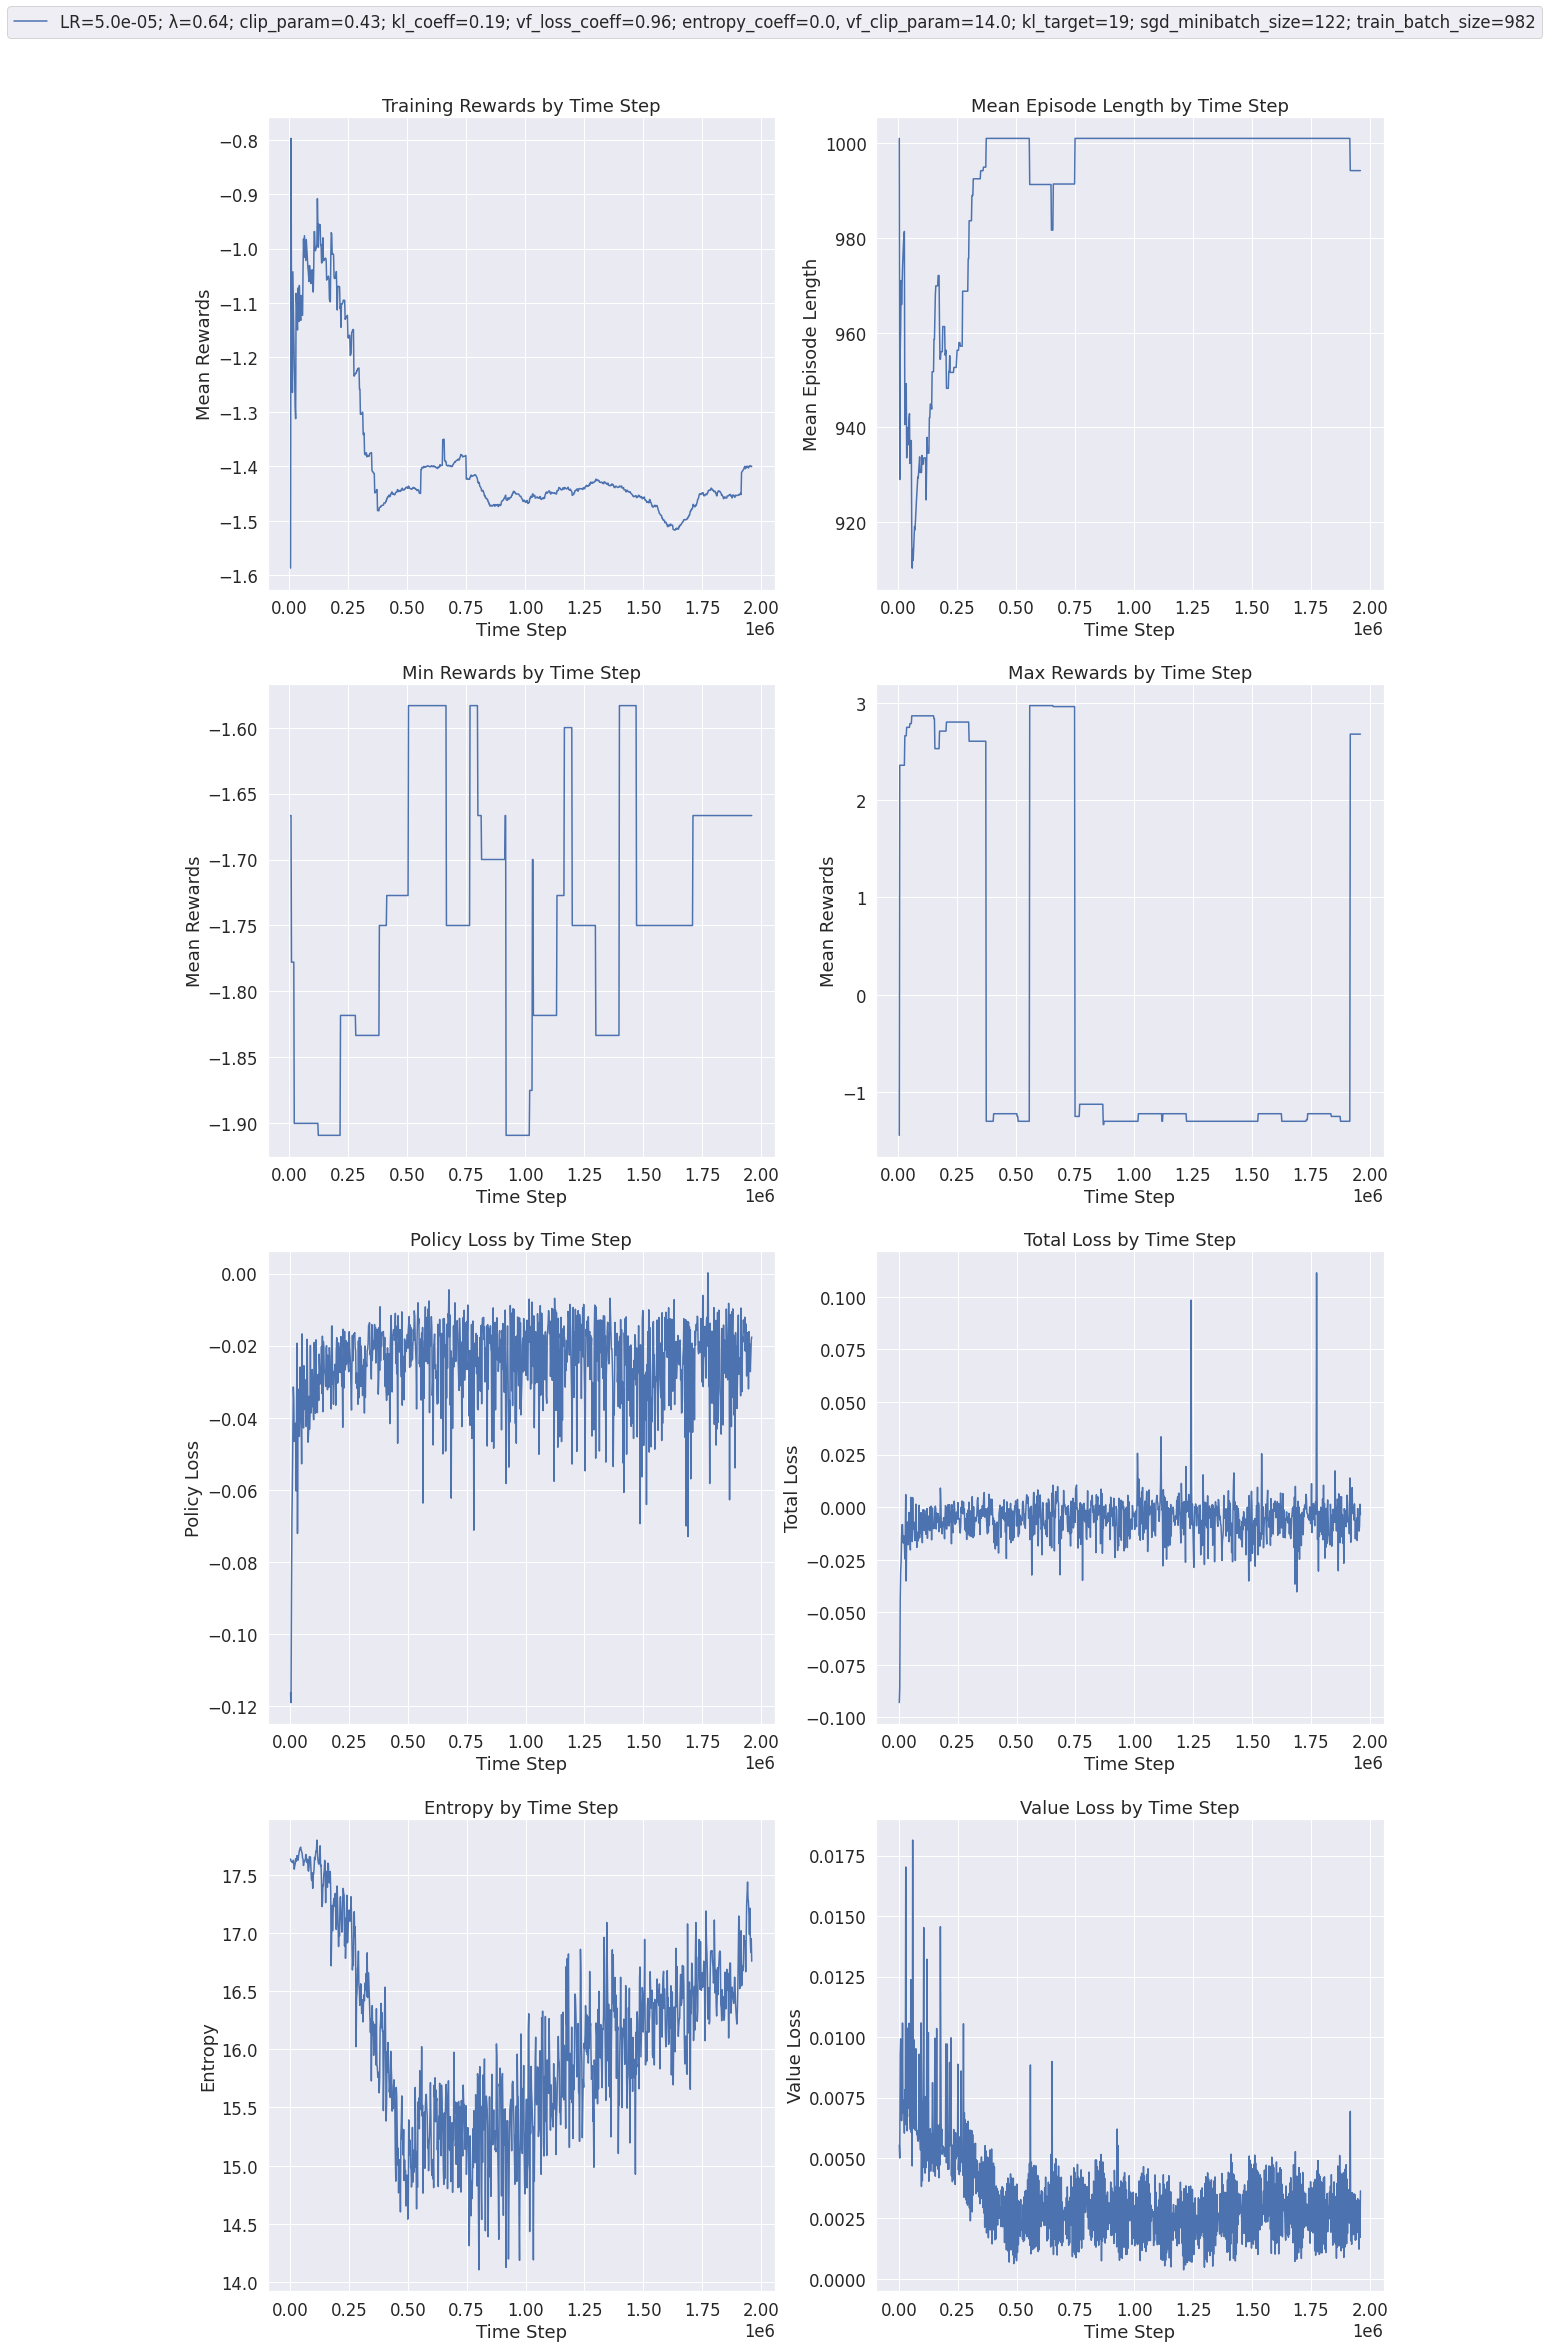

In [159]:
analysis_tunned_v2 = ExperimentAnalysis('/home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_v2_tunned_config/sample_0/PPO_2022-03-08_23-43-03')

plot_hypertune(analysis=analysis_tunned_v2)

## v3 Midly Shaped Reward (Reduced steps)

### Hyperparam tune basic_v3

#### Inicialize Trainer

In [2]:
config = DEFAULT_CONFIG.copy()
config['env_config'] = biclustering.binary.basic_v3

trainer = Trainer(
    trainer=PPOTrainer,
    env='BiclusterEnv-v0',
    save_dir='/home/pgcotovio/repos/nclustRL/Exp/test_framework2',
    name='basic_config_v3_hypertune',
    config=config
)

2022-03-10 01:09:18,097	INFO ppo.py:166 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
(RolloutWorker pid=352196) 2022-03-10 01:09:22,365	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=352193) 2022-03-10 01:09:22,386	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=352200) 2022-03-10 01:09:22,501	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=352199) 2022-03-10 01:09:22,457	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=352200) 2022-03-10 01:09:27,055	INFO rollout_worker.py:1705 -- Validating sub-env at vector index=0 ... (ok)
(RolloutWorker pid=352200) 2022-03-10 01:09:27,056	DEBUG rollout_worker.py:1534 -- Creating policy for default_policy
(RolloutWorker pid=352193

#### Tune agent

In [3]:
best_checkpoint = trainer.train(
    num_samples=8, 
    scheduler=PPO_PBT,
    stop_iters=500,
)
best_checkpoint

2022-03-10 14:58:51,697	INFO tune.py:626 -- Total run time: 49759.16 seconds (49758.25 seconds for the tuning loop).
Sample 1: : 1sample [13:49:19, 49759.24s/sample, metric={'episode_reward_max': 0.6277777777777778, 'episode_reward_min': 0.12272727272727266, 'episode_reward_mean': 0.3908080808080808, 'episode_len_mean': 51.0, 'episode_media': {}, 'episodes_this_iter': 24, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [0.3954545454545454, 0.3954545454545454, 0.44999999999999996, 0.44999999999999996, 0.3954545454545454, 0.30454545454545456, 0.44999999999999996, 0.6277777777777778, 0.6, 0.44999999999999996, 0.30454545454545456, 0.35, 0.30454545454545456, 0.35, 0.35, 0.30454545454545456, 0.35, 0.30454545454545456, 0.44999999999999996, 0.1833333333333332, 0.6277777777777778, 0.12272727272727266, 0.3954545454545454, 0.5499999999999999, 0.5166666666666666, 0.35, 0.5166666666666666, 0.5499999999999999, 0.39545

{'config': {'num_workers': 4,
  'create_env_on_driver': False,
  'num_envs_per_worker': 1,
  'batch_mode': 'truncate_episodes',
  'gamma': 0.99,
  'use_critic': True,
  'use_gae': True,
  'lambda': 0.37748736000000005,
  'kl_coeff': 0.382205952,
  'rollout_fragment_length': 256,
  'train_batch_size': 577,
  'sgd_minibatch_size': 70,
  'shuffle_sequences': True,
  'num_sgd_iter': 21,
  'lr': 1e-05,
  'lr_schedule': None,
  'vf_loss_coeff': 0.8493465600000002,
  'entropy_coeff': 0.0,
  'entropy_coeff_schedule': None,
  'clip_param': 0.254803968,
  'vf_clip_param': 3.7748736000000016,
  'grad_clip': None,
  'kl_target': 0.008493465599999998,
  'optimizer': {},
  'horizon': None,
  'soft_horizon': False,
  'no_done_at_end': False,
  'env': 'BiclusterEnv-v0',
  'observation_space': None,
  'action_space': None,
  'env_config': {'shape': [[6, 6], [6, 6]],
   'n': 1,
   'clusters': [1, 1],
   'dataset_settings': {'dstype': {'value': 'Symbolic'},
    'patterns': {'value': [['CONSTANT', 'CONSTA

E0310 15:46:37.915773861 1387312 backup_poller.cc:134]       Run client channel backup poller: {"created":"@1646927197.915734587","description":"pollset_work","file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":320,"referenced_errors":[{"created":"@1646927197.915729898","description":"Bad file descriptor","errno":9,"file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":950,"os_error":"Bad file descriptor","syscall":"epoll_wait"}]}


#### Evaluate tune and get config

In [8]:
best_checkpoint['metric']['episode_reward_mean']

0.3908080808080808

In [ ]:
tunned_v3_config = best_checkpoint['config']

configs = TrainerConfig('tunned_v3_configs', '/home/pgcotovio/repos/nclustRL/Exp/test_framework2')
configs.save(tunned_v3_config)

tunned_v3_config == configs.obj

In [12]:
best_checkpoint['path']

'/home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_config_v3_hypertune/sample_0/PPO_2022-03-10_01-09-32/PPO_BiclusterEnv-v0_be5d5_00001_1_2022-03-10_01-09-32/checkpoint_000500/checkpoint-500'

In [13]:
# load and test
trainer.load('/home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_config_v3_hypertune/sample_0/PPO_2022-03-10_01-09-32/PPO_BiclusterEnv-v0_be5d5_00001_1_2022-03-10_01-09-32/checkpoint_000500/checkpoint-500')

trainer.test(10)

2022-03-10 17:03:03,883	INFO trainable.py:467 -- Restored on 10.20.0.204 from checkpoint: /home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_config_v3_hypertune/sample_0/PPO_2022-03-10_01-09-32/PPO_BiclusterEnv-v0_be5d5_00001_1_2022-03-10_01-09-32/checkpoint_000500/checkpoint-500
2022-03-10 17:03:03,884	INFO trainable.py:475 -- Current state after restoring: {'_iteration': 500, '_timesteps_total': 0, '_time_total': 5351.209007740021, '_episodes_total': 10635}


Episode 1 of 10 done.
Episode 2 of 10 done.
Episode 3 of 10 done.
Episode 4 of 10 done.
Episode 5 of 10 done.
Episode 6 of 10 done.
Episode 7 of 10 done.
Episode 8 of 10 done.
Episode 9 of 10 done.
Episode 10 of 10 done.


(-0.007142857142857212, 0.14285714285714285, 0.35760759099939604)

#### Plot

2022-03-16 01:31:13,748	INFO experiment_analysis.py:673 -- No `self.trials`. Drawing logdirs from checkpoint file. This may result in some information that is out of sync, as checkpointing is periodic.


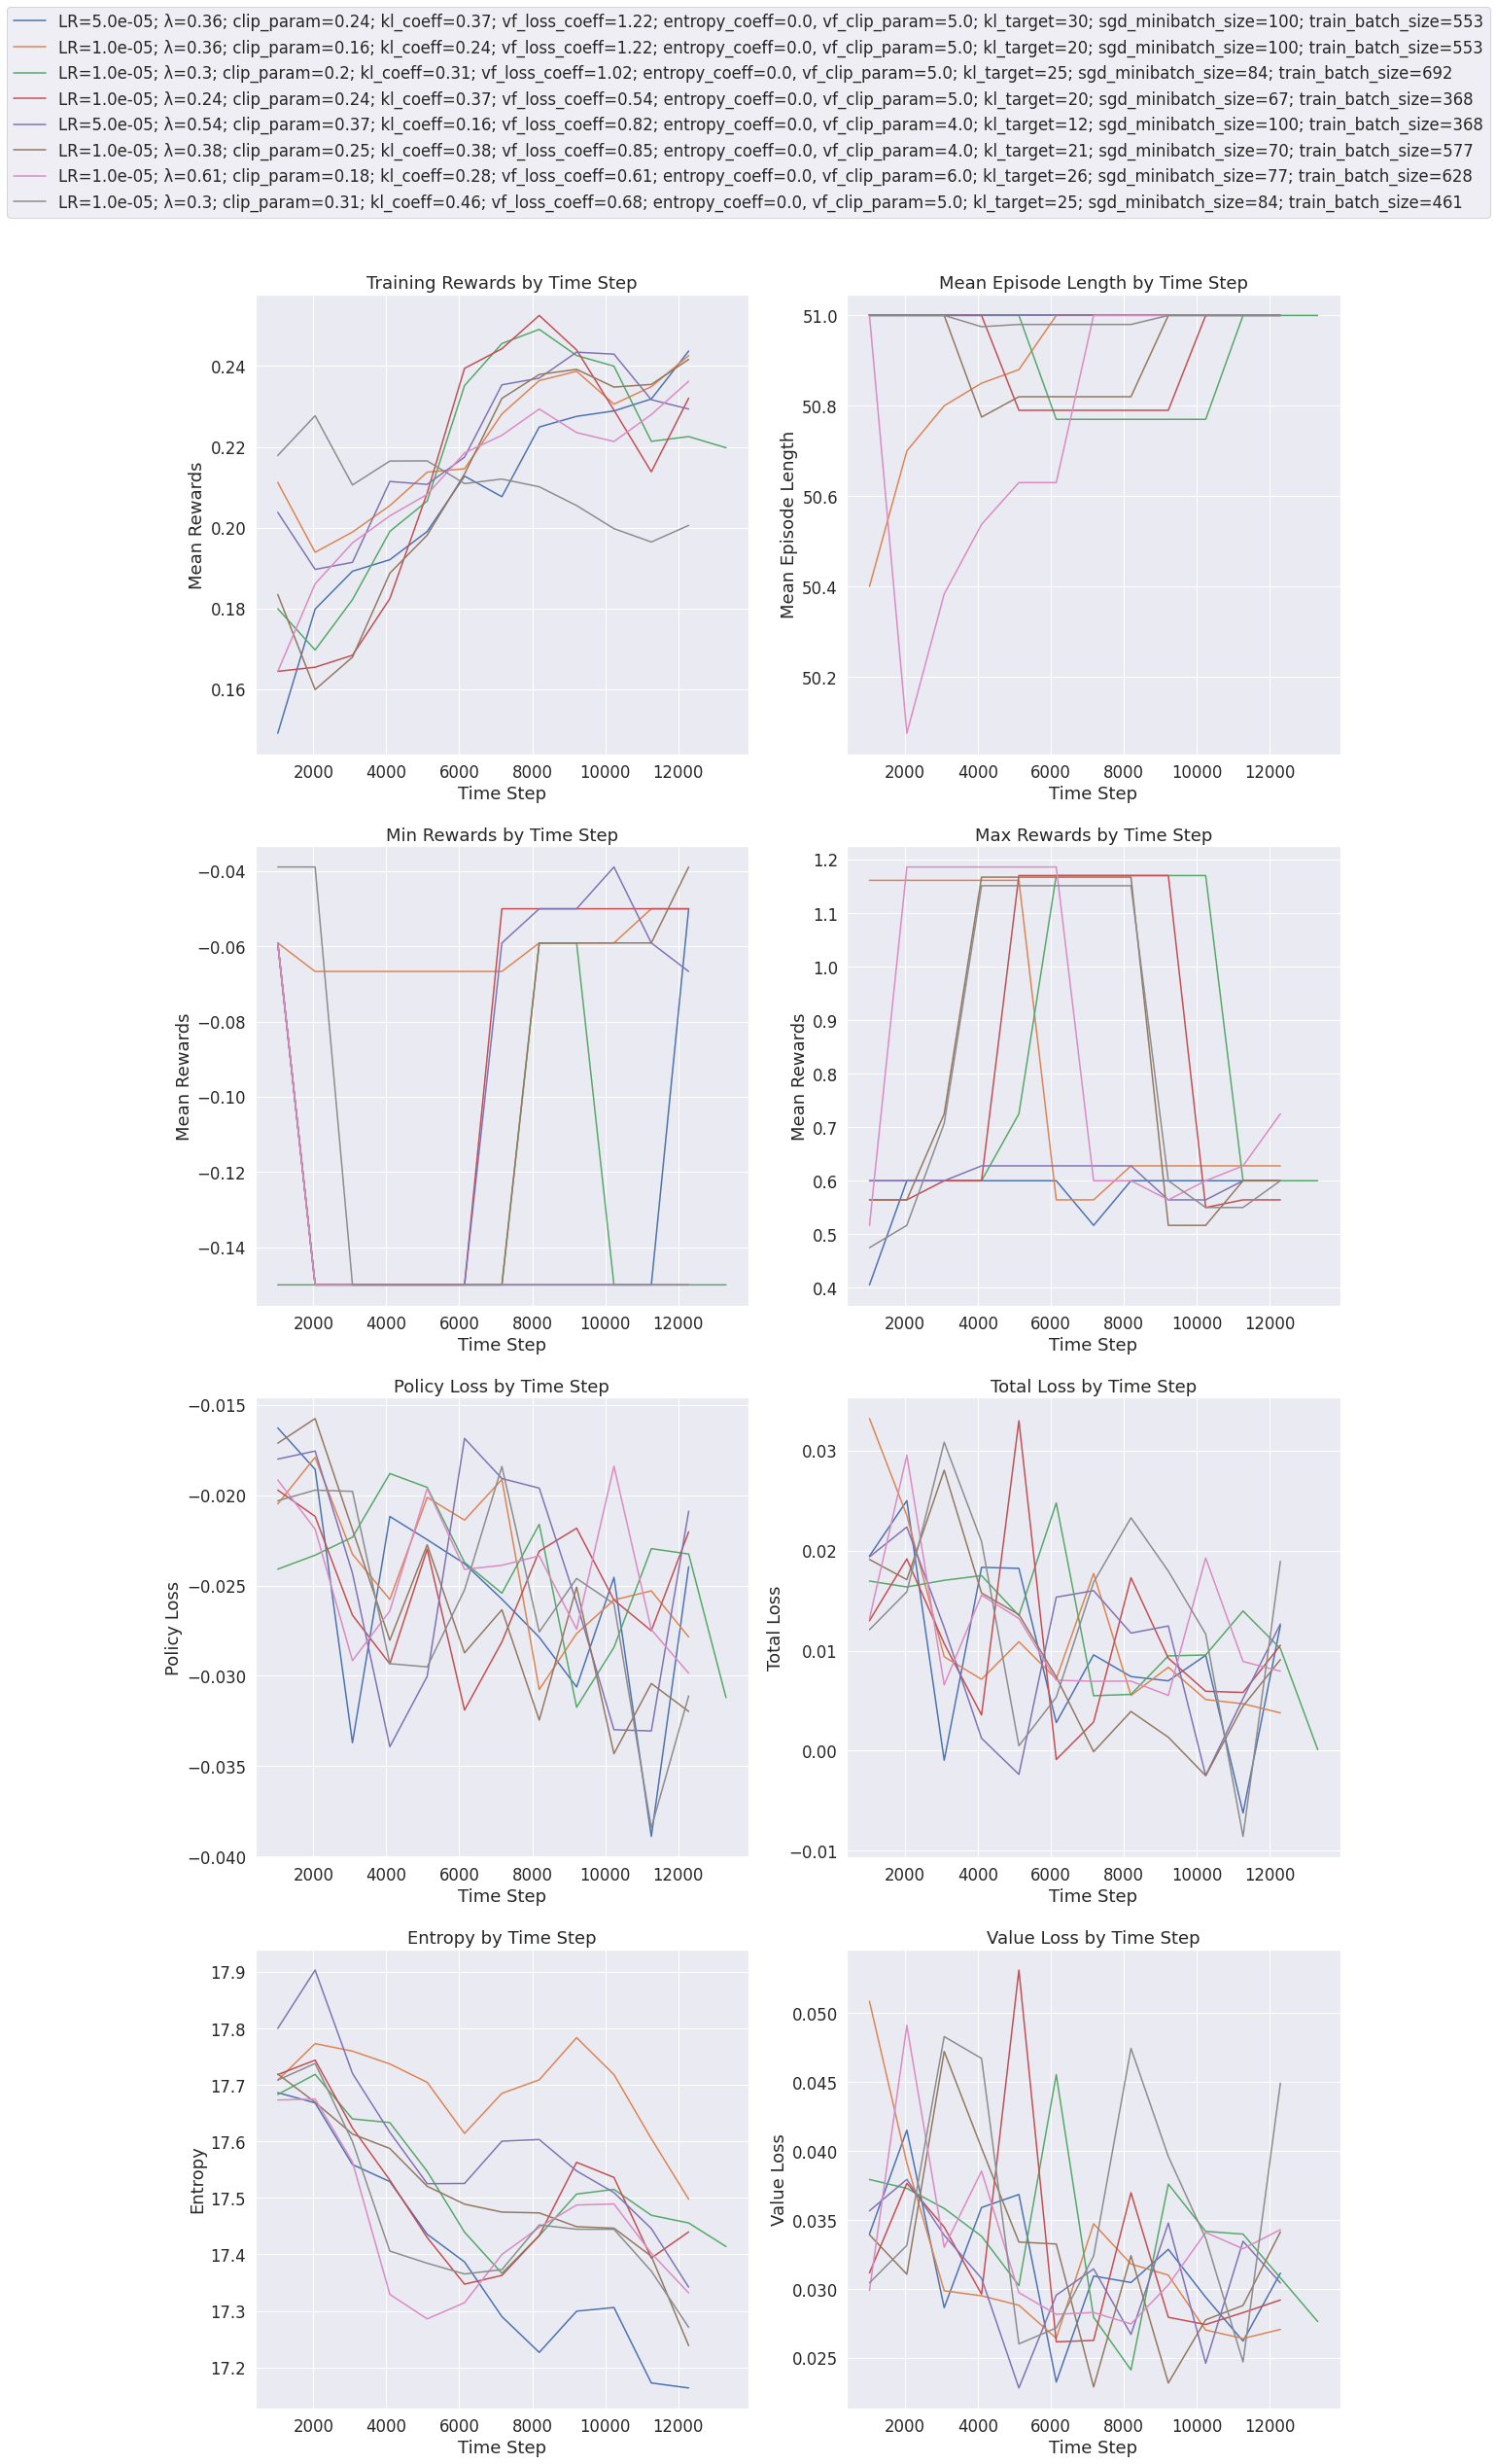

In [160]:
analysis_hyperparam_v3 = ExperimentAnalysis('/home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_config_v3_hypertune/sample_0/PPO_2022-03-10_01-09-32')

plot_hypertune(analysis=analysis_hyperparam_v3)

### Train basic_v3 (tunned)

#### Inicialize Trainer

In [2]:
configs = TrainerConfig('tunned_v3_configs', '/home/pgcotovio/repos/nclustRL/Exp/test_framework2')
tunned_v3_config = configs.obj

trainer_basic_v3_tunned = Trainer(
    trainer=PPOTrainer,
    env='BiclusterEnv-v0',
    save_dir='/home/pgcotovio/repos/nclustRL/Exp/test_framework2',
    name='basic_v3_tunned_config',
    config=tunned_v3_config
)

2022-03-10 23:04:54,613	WARNING ppo.py:143 -- `train_batch_size` (577) cannot be achieved with your other settings (num_workers=4 num_envs_per_worker=1 rollout_fragment_length=256)! Auto-adjusting `rollout_fragment_length` to 144.
2022-03-10 23:04:54,614	INFO ppo.py:166 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
(RolloutWorker pid=1744048) 2022-03-10 23:04:58,788	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=1744046) 2022-03-10 23:04:58,879	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=1744051) 2022-03-10 23:04:59,049	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=1744045) 2022-03-10 23:04:59,065	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=1744048) 2022-03-

#### Test random agent

In [6]:
trainer_basic_v3_tunned.test(10)

Episode 1 of 10 done.
Episode 2 of 10 done.
Episode 3 of 10 done.
Episode 4 of 10 done.
Episode 5 of 10 done.
Episode 6 of 10 done.
Episode 7 of 10 done.
Episode 8 of 10 done.
Episode 9 of 10 done.
Episode 10 of 10 done.


(-0.1071428571428572, 0.0714285714285714, 0.3455851513004745)

#### Train agent

In [7]:
best_checkpoint = trainer_basic_v3_tunned.train(stop_iters=1000)

2022-03-10 20:39:37,271	INFO tune.py:626 -- Total run time: 12225.19 seconds (12224.74 seconds for the tuning loop).
Sample 1: : 1sample [3:23:45, 12225.23s/sample, metric={'episode_reward_max': 0.6277777777777778, 'episode_reward_min': 0.09999999999999995, 'episode_reward_mean': 0.3676515151515152, 'episode_len_mean': 51.0, 'episode_media': {}, 'episodes_this_iter': 22, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [0.2666666666666667, 0.3954545454545454, 0.3954545454545454, 0.48636363636363633, 0.30454545454545456, 0.3954545454545454, 0.3954545454545454, 0.2666666666666667, 0.30454545454545456, 0.3954545454545454, 0.3954545454545454, 0.3954545454545454, 0.2136363636363636, 0.48636363636363633, 0.09999999999999995, 0.30454545454545456, 0.2666666666666667, 0.40555555555555556, 0.3954545454545454, 0.1833333333333332, 0.30454545454545456, 0.44999999999999996, 0.2666666666666667, 0.44999999999999996, 0.09

#### Test trained agent

In [8]:
best_checkpoint['df']

episode_reward_max  episode_reward_min  episode_reward_mean  \
0               1.183                 0.1             0.407151   

   episode_len_mean  episodes_this_iter  num_healthy_workers  timesteps_total  \
0             50.47                  23                    4          1032192   

   timesteps_this_iter  agent_timesteps_total   done  ...  \
0                    0                1032192  False  ...   

   config/shuffle_sequences  config/soft_horizon config/synchronize_filters  \
0                      True                False                       True   

  config/timesteps_per_iteration config/train_batch_size  config/use_critic  \
0                              0                     577               True   

   config/use_gae  config/vf_clip_param  config/vf_loss_coeff  \
0            True              3.774874              0.849347   

                                              logdir  
0  /home/pgcotovio/repos/nclustRL/Exp/test_framew...  

[1 rows x 130 columns]

In [9]:
best_checkpoint['path']

'/home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_v3_tunned_config/sample_0/PPO_2022-03-10_17-15-52/PPO_BiclusterEnv-v0_bcdd2_00000_0_2022-03-10_17-15-52/checkpoint_000980/checkpoint-980'

In [4]:
# load and test
trainer_basic_v3_tunned.load('/home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_v3_tunned_config/sample_0/PPO_2022-03-10_17-15-52/PPO_BiclusterEnv-v0_bcdd2_00000_0_2022-03-10_17-15-52/checkpoint_000980/checkpoint-980')

trainer_basic_v3_tunned.test(10)

2022-03-10 23:05:29,494	INFO trainable.py:467 -- Restored on 10.20.0.204 from checkpoint: /home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_v3_tunned_config/sample_0/PPO_2022-03-10_17-15-52/PPO_BiclusterEnv-v0_bcdd2_00000_0_2022-03-10_17-15-52/checkpoint_000980/checkpoint-980
2022-03-10 23:05:29,495	INFO trainable.py:475 -- Current state after restoring: {'_iteration': 980, '_timesteps_total': 0, '_time_total': 11948.106652021408, '_episodes_total': 22159}


Episode 1 of 10 done.
Episode 2 of 10 done.
Episode 3 of 10 done.
Episode 4 of 10 done.
Episode 5 of 10 done.
Episode 6 of 10 done.
Episode 7 of 10 done.
Episode 8 of 10 done.
Episode 9 of 10 done.
Episode 10 of 10 done.


(-0.035714285714285816, 0.11428571428571424, 0.3286868808005238)

#### Plot

2022-03-16 01:33:28,765	INFO experiment_analysis.py:673 -- No `self.trials`. Drawing logdirs from checkpoint file. This may result in some information that is out of sync, as checkpointing is periodic.


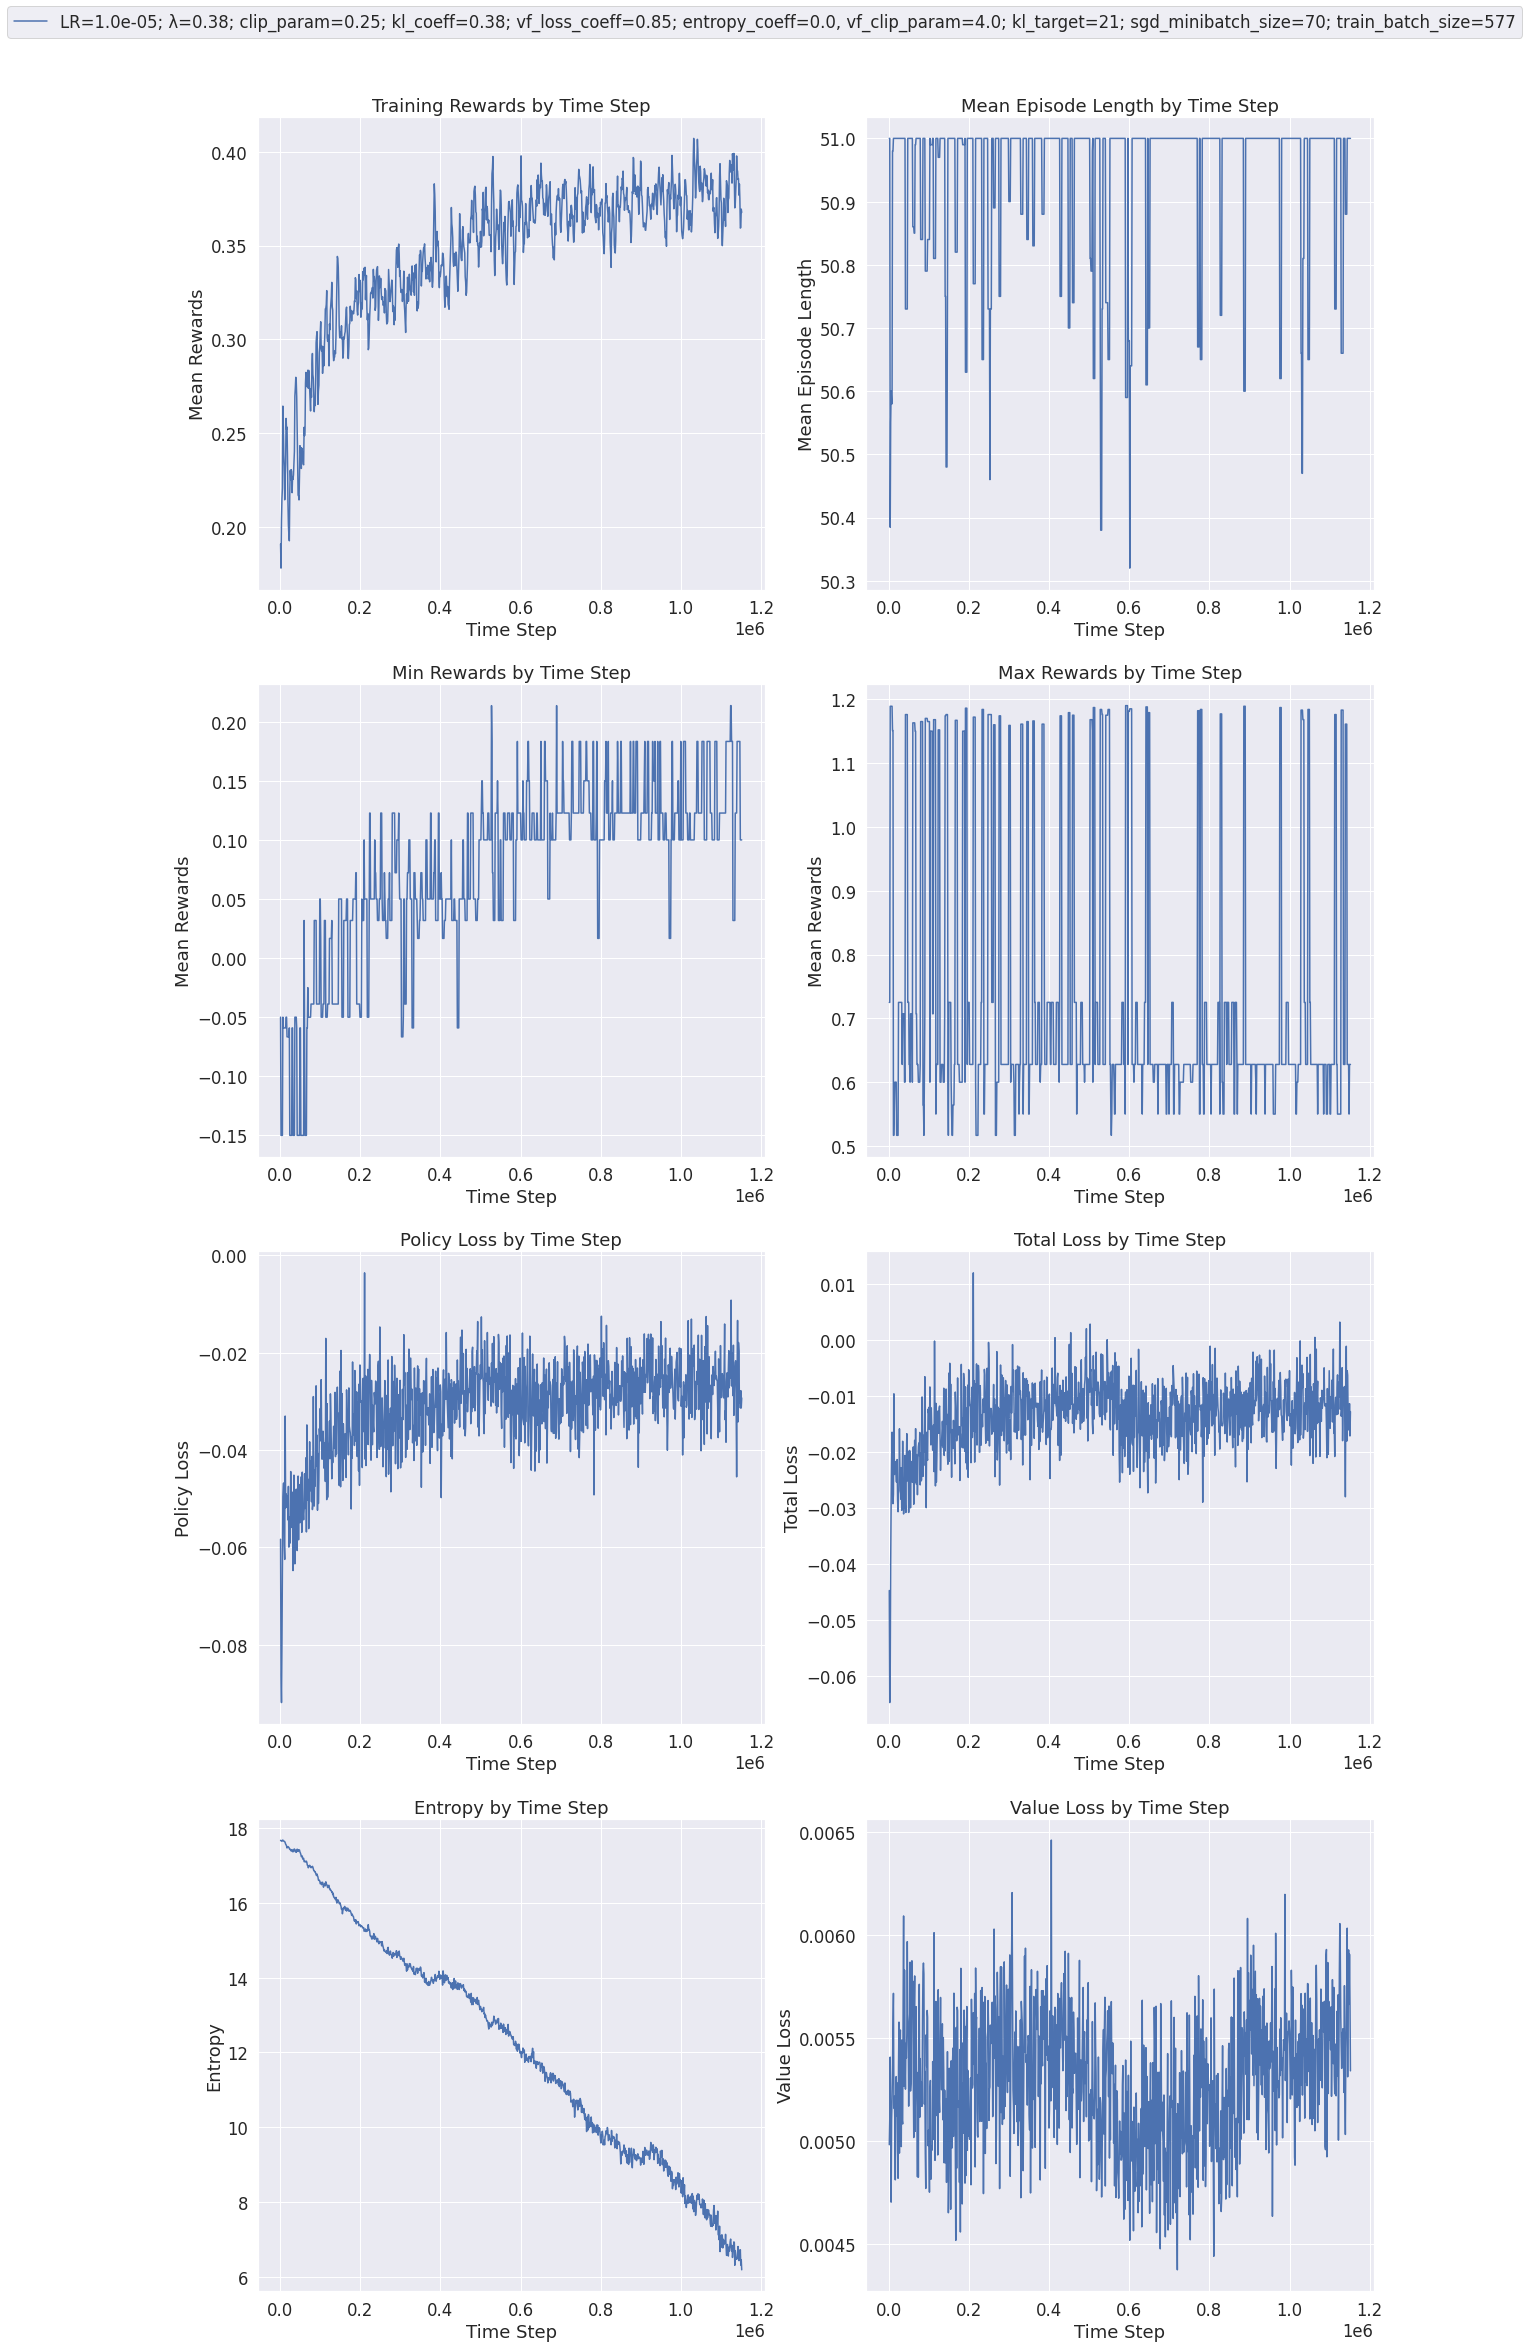

In [162]:
analysis_tunned_v3 = ExperimentAnalysis('/home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_v3_tunned_config/sample_0/PPO_2022-03-10_17-15-52')

plot_hypertune(analysis=analysis_tunned_v3)

# v3 Search Max_Steps

#### Inicialize trainer

In [2]:
configs = TrainerConfig('tunned_v3_configs', '/home/pgcotovio/repos/nclustRL/Exp/test_framework2')
tunned_v3_config = configs.obj

tunned_v3_config['env_config']['max_steps'] = uniform(50, 1000)

trainer_basic_v3_tunned = Trainer(
    trainer=PPOTrainer,
    env='BiclusterEnv-v0',
    save_dir='/home/pgcotovio/repos/nclustRL/Exp/test_framework2',
    name='basic_config_v3_tunned_maxsteps_hypertune',
    config=tunned_v3_config
)

2022-03-11 01:05:45,072	WARNING ppo.py:143 -- `train_batch_size` (577) cannot be achieved with your other settings (num_workers=4 num_envs_per_worker=1 rollout_fragment_length=256)! Auto-adjusting `rollout_fragment_length` to 144.
2022-03-11 01:05:45,073	INFO ppo.py:166 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
(RolloutWorker pid=1813369) 2022-03-11 01:05:49,396	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=1813372) 2022-03-11 01:05:49,462	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=1813364) 2022-03-11 01:05:49,519	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=1813367) 2022-03-11 01:05:49,761	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=1813369) 2022-03-

#### Train agent

In [3]:
bayesopt = BayesOptSearch(metric="mean_loss", mode="min")

best_checkpoint = trainer_basic_v3_tunned.train(
    num_samples=8,
    stop_iters=500,
    search_alg=bayesopt
)
best_checkpoint

2022-03-11 14:44:23,655	INFO tune.py:626 -- Total run time: 49101.90 seconds (49101.42 seconds for the tuning loop).
Sample 1: : 1sample [13:38:23, 49103.15s/sample, metric={'episode_reward_max': 0.4949999999999999, 'episode_reward_min': 0.12833333333333316, 'episode_reward_mean': 0.3499696969696969, 'episode_len_mean': 106.0, 'episode_media': {}, 'episodes_this_iter': 12, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [0.4313636363636363, 0.4313636363636363, 0.29499999999999993, 0.29499999999999993, 0.4313636363636363, 0.4313636363636363, 0.34045454545454534, 0.29499999999999993, 0.3783333333333333, 0.4313636363636363, 0.12833333333333316, 0.29499999999999993, 0.4313636363636363, 0.4313636363636363, 0.34045454545454534, 0.29499999999999993, 0.34045454545454534, 0.3949999999999999, 0.29499999999999993, 0.21166666666666664, 0.29499999999999993, 0.2495454545454545, 0.34045454545454534, 0.4313636363636363,

{'config': {'num_workers': 4,
  'create_env_on_driver': False,
  'num_envs_per_worker': 1,
  'batch_mode': 'truncate_episodes',
  'gamma': 0.99,
  'use_critic': True,
  'use_gae': True,
  'lambda': 0.37748736000000005,
  'kl_coeff': 0.382205952,
  'rollout_fragment_length': 256,
  'train_batch_size': 577,
  'sgd_minibatch_size': 70,
  'shuffle_sequences': True,
  'num_sgd_iter': 21,
  'lr': 1e-05,
  'lr_schedule': None,
  'vf_loss_coeff': 0.8493465600000002,
  'entropy_coeff': 0.0,
  'entropy_coeff_schedule': None,
  'clip_param': 0.254803968,
  'vf_clip_param': 3.7748736000000016,
  'grad_clip': None,
  'kl_target': 0.008493465599999998,
  'optimizer': {},
  'horizon': None,
  'soft_horizon': False,
  'no_done_at_end': False,
  'env': 'BiclusterEnv-v0',
  'observation_space': None,
  'action_space': None,
  'env_config': {'shape': [[6, 6], [6, 6]],
   'n': 1,
   'clusters': [1, 1],
   'dataset_settings': {'dstype': {'value': 'Symbolic'},
    'patterns': {'value': [['CONSTANT', 'CONSTA

E0311 14:49:16.116082301 2731683 backup_poller.cc:134]       Run client channel backup poller: {"created":"@1647010156.116020885","description":"pollset_work","file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":320,"referenced_errors":[{"created":"@1647010156.116012960","description":"Bad file descriptor","errno":9,"file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":950,"os_error":"Bad file descriptor","syscall":"epoll_wait"}]}
E0311 15:27:26.448039843 2753000 backup_poller.cc:134]       Run client channel backup poller: {"created":"@1647012446.448001360","description":"pollset_work","file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":320,"referenced_errors":[{"created":"@1647012446.447996761","description":"Bad file descriptor","errno":9,"file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":950,"os_error":"Bad file descriptor","syscall":"epoll_wait"}]}
E0311 15:45:01.530062746 2762841 backup_poller.cc:134]       Run client channel backup poller: {"created

#### Get configs

In [4]:
best_checkpoint['df']

episode_reward_max  episode_reward_min  episode_reward_mean  \
0               1.080           -0.305000             0.149254   
1               1.100           -0.962091            -0.449645   
2               1.140           -0.733889            -0.241291   
3               1.153           -0.384667             0.028061   
4               1.164            0.118667             0.291938   
5               1.182            0.202000             0.290654   
6               1.181            0.211667             0.380874   
7               0.861           -0.872000            -0.365298   

   episode_len_mean  episodes_this_iter  num_healthy_workers  timesteps_total  \
0        354.800000                   2                    4             4608   
1        888.610000                   4                    4           101376   
2        692.670000                   1                    4            80640   
3        504.600000                   5                    4             3456   
4        195.800000                   5                    4           369792   
5        197.190000                   5                    4           415872   
6        104.530000                   8                    4           554112   
7        837.290323                   2                    4            27648   

   timesteps_this_iter  agent_timesteps_total   done  ...  config/use_critic  \
0                    0                   4608  False  ...               True   
1                    0                 101376  False  ...               True   
2                    0                  80640  False  ...               True   
3                    0                   3456  False  ...               True   
4                    0                 369792  False  ...               True   
5                    0                 415872  False  ...               True   
6                    0                 554112  False  ...               True   
7                    0                  27648  False  ...               True   

   config/use_gae config/vf_clip_param config/vf_loss_coeff  \
0            True             3.774874             0.849347   
1            True             3.774874             0.849347   
2            True             3.774874             0.849347   
3            True             3.774874             0.849347   
4            True             3.774874             0.849347   
5            True             3.774874             0.849347   
6            True             3.774874             0.849347   
7            True             3.774874             0.849347   

                                              logdir  \
0  /home/pgcotovio/repos/nclustRL/Exp/test_framew...   
1  /home/pgcotovio/repos/nclustRL/Exp/test_framew...   
2  /home/pgcotovio/repos/nclustRL/Exp/test_framew...   
3  /home/pgcotovio/repos/nclustRL/Exp/test_framew...   
4  /home/pgcotovio/repos/nclustRL/Exp/test_framew...   
5  /home/pgcotovio/repos/nclustRL/Exp/test_framew...   
6  /home/pgcotovio/repos/nclustRL/Exp/test_framew...   
7  /home/pgcotovio/repos/nclustRL/Exp/test_framew...   

   sampler_perf/mean_raw_obs_processing_ms  sampler_perf/mean_inference_ms  \
0                                      NaN                             NaN   
1                                      NaN                             NaN   
2                                      NaN                             NaN   
3                                      NaN                             NaN   
4                                 0.180078                       15.812061   
5                                 0.181983                       15.808136   
6                                 0.197775                       15.539687   
7                                      NaN                             NaN   

   sampler_perf/mean_action_processing_ms  sampler_perf/mean_env_wait_ms  \
0                                     NaN                            NaN   
1                            

In [5]:
best_checkpoint['config']['env_config']['max_steps']

105.17943155978949

In [6]:
best_checkpoint['path']

'/home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_config_v3_tunned_maxsteps_hypertune/sample_0/PPO_2022-03-11_01-06-01/PPO_BiclusterEnv-v0_4a7daf16_7__disable_preprocessor_api=True,_fake_gpus=False,action_space=None,batch_mode=truncate_episodes,clip_2022-03-11_09-40-30/checkpoint_000480/checkpoint-480'

In [8]:
tunned_v3_maxsteps_config = best_checkpoint['config']

configs = TrainerConfig('tunned_v3_maxsteps_config', '/home/pgcotovio/repos/nclustRL/Exp/test_framework2')
configs.save(tunned_v3_maxsteps_config)

tunned_v3_maxsteps_config == configs.obj

True

#### Evaluating results

In [ ]:
configs = TrainerConfig('tunned_v3_maxsteps_config', '/home/pgcotovio/repos/nclustRL/Exp/test_framework2')
tunned_v3_maxsteps_config = configs.obj
tunned_v3_maxsteps_config['env_config']['max_steps'] = int(tunned_v3_maxsteps_config['env_config']['max_steps'])
configs.save(tunned_v3_maxsteps_config)

In [2]:
configs = TrainerConfig('tunned_v3_maxsteps_config', '/home/pgcotovio/repos/nclustRL/Exp/test_framework2')

trainer_basic_v3_tunned = Trainer(
    trainer=PPOTrainer,
    env='BiclusterEnv-v0',
    save_dir='/home/pgcotovio/repos/nclustRL/Exp/test_framework2',
    name='basic_config_v3_tunned_maxsteps_hypertune',
    config=configs.obj
)

2022-03-11 21:53:06,805	WARNING ppo.py:143 -- `train_batch_size` (577) cannot be achieved with your other settings (num_workers=4 num_envs_per_worker=1 rollout_fragment_length=256)! Auto-adjusting `rollout_fragment_length` to 144.
2022-03-11 21:53:06,806	INFO ppo.py:166 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
(RolloutWorker pid=2974148) 2022-03-11 21:53:11,064	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=2974156) 2022-03-11 21:53:11,225	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=2974155) 2022-03-11 21:53:11,183	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=2974149) 2022-03-11 21:53:11,427	INFO worker.py:852 -- Calling ray.init() again after it has already been called.
(RolloutWorker pid=2974148) 2022-03-

In [4]:
trainer_basic_v3_tunned.load('/home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_config_v3_tunned_maxsteps_hypertune/sample_0/PPO_2022-03-11_01-06-01/PPO_BiclusterEnv-v0_4a7daf16_7__disable_preprocessor_api=True,_fake_gpus=False,action_space=None,batch_mode=truncate_episodes,clip_2022-03-11_09-40-30/checkpoint_000480/checkpoint-480')

trainer_basic_v3_tunned.test(10)

2022-03-11 21:53:40,439	INFO trainable.py:467 -- Restored on 10.20.0.204 from checkpoint: /home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_config_v3_tunned_maxsteps_hypertune/sample_0/PPO_2022-03-11_01-06-01/PPO_BiclusterEnv-v0_4a7daf16_7__disable_preprocessor_api=True,_fake_gpus=False,action_space=None,batch_mode=truncate_episodes,clip_2022-03-11_09-40-30/checkpoint_000480/checkpoint-480
2022-03-11 21:53:40,440	INFO trainable.py:475 -- Current state after restoring: {'_iteration': 480, '_timesteps_total': 0, '_time_total': 5822.938663959503, '_episodes_total': 5229}


Episode 1 of 10 done.
Episode 2 of 10 done.
Episode 3 of 10 done.
Episode 4 of 10 done.
Episode 5 of 10 done.
Episode 6 of 10 done.
Episode 7 of 10 done.
Episode 8 of 10 done.
Episode 9 of 10 done.
Episode 10 of 10 done.


(-0.10500000000000013, 0.09999999999999995, 0.687890284700552)

E0311 22:11:34.028208035 2985287 backup_poller.cc:134]       Run client channel backup poller: {"created":"@1647036694.028138984","description":"pollset_work","file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":320,"referenced_errors":[{"created":"@1647036694.028131981","description":"Bad file descriptor","errno":9,"file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":950,"os_error":"Bad file descriptor","syscall":"epoll_wait"}]}
E0311 22:11:54.071101082 2985510 backup_poller.cc:134]       Run client channel backup poller: {"created":"@1647036714.071070624","description":"pollset_work","file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":320,"referenced_errors":[{"created":"@1647036714.071066526","description":"Bad file descriptor","errno":9,"file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":950,"os_error":"Bad file descriptor","syscall":"epoll_wait"}]}


#### Plot

2022-03-16 01:42:04,029	INFO experiment_analysis.py:673 -- No `self.trials`. Drawing logdirs from checkpoint file. This may result in some information that is out of sync, as checkpointing is periodic.


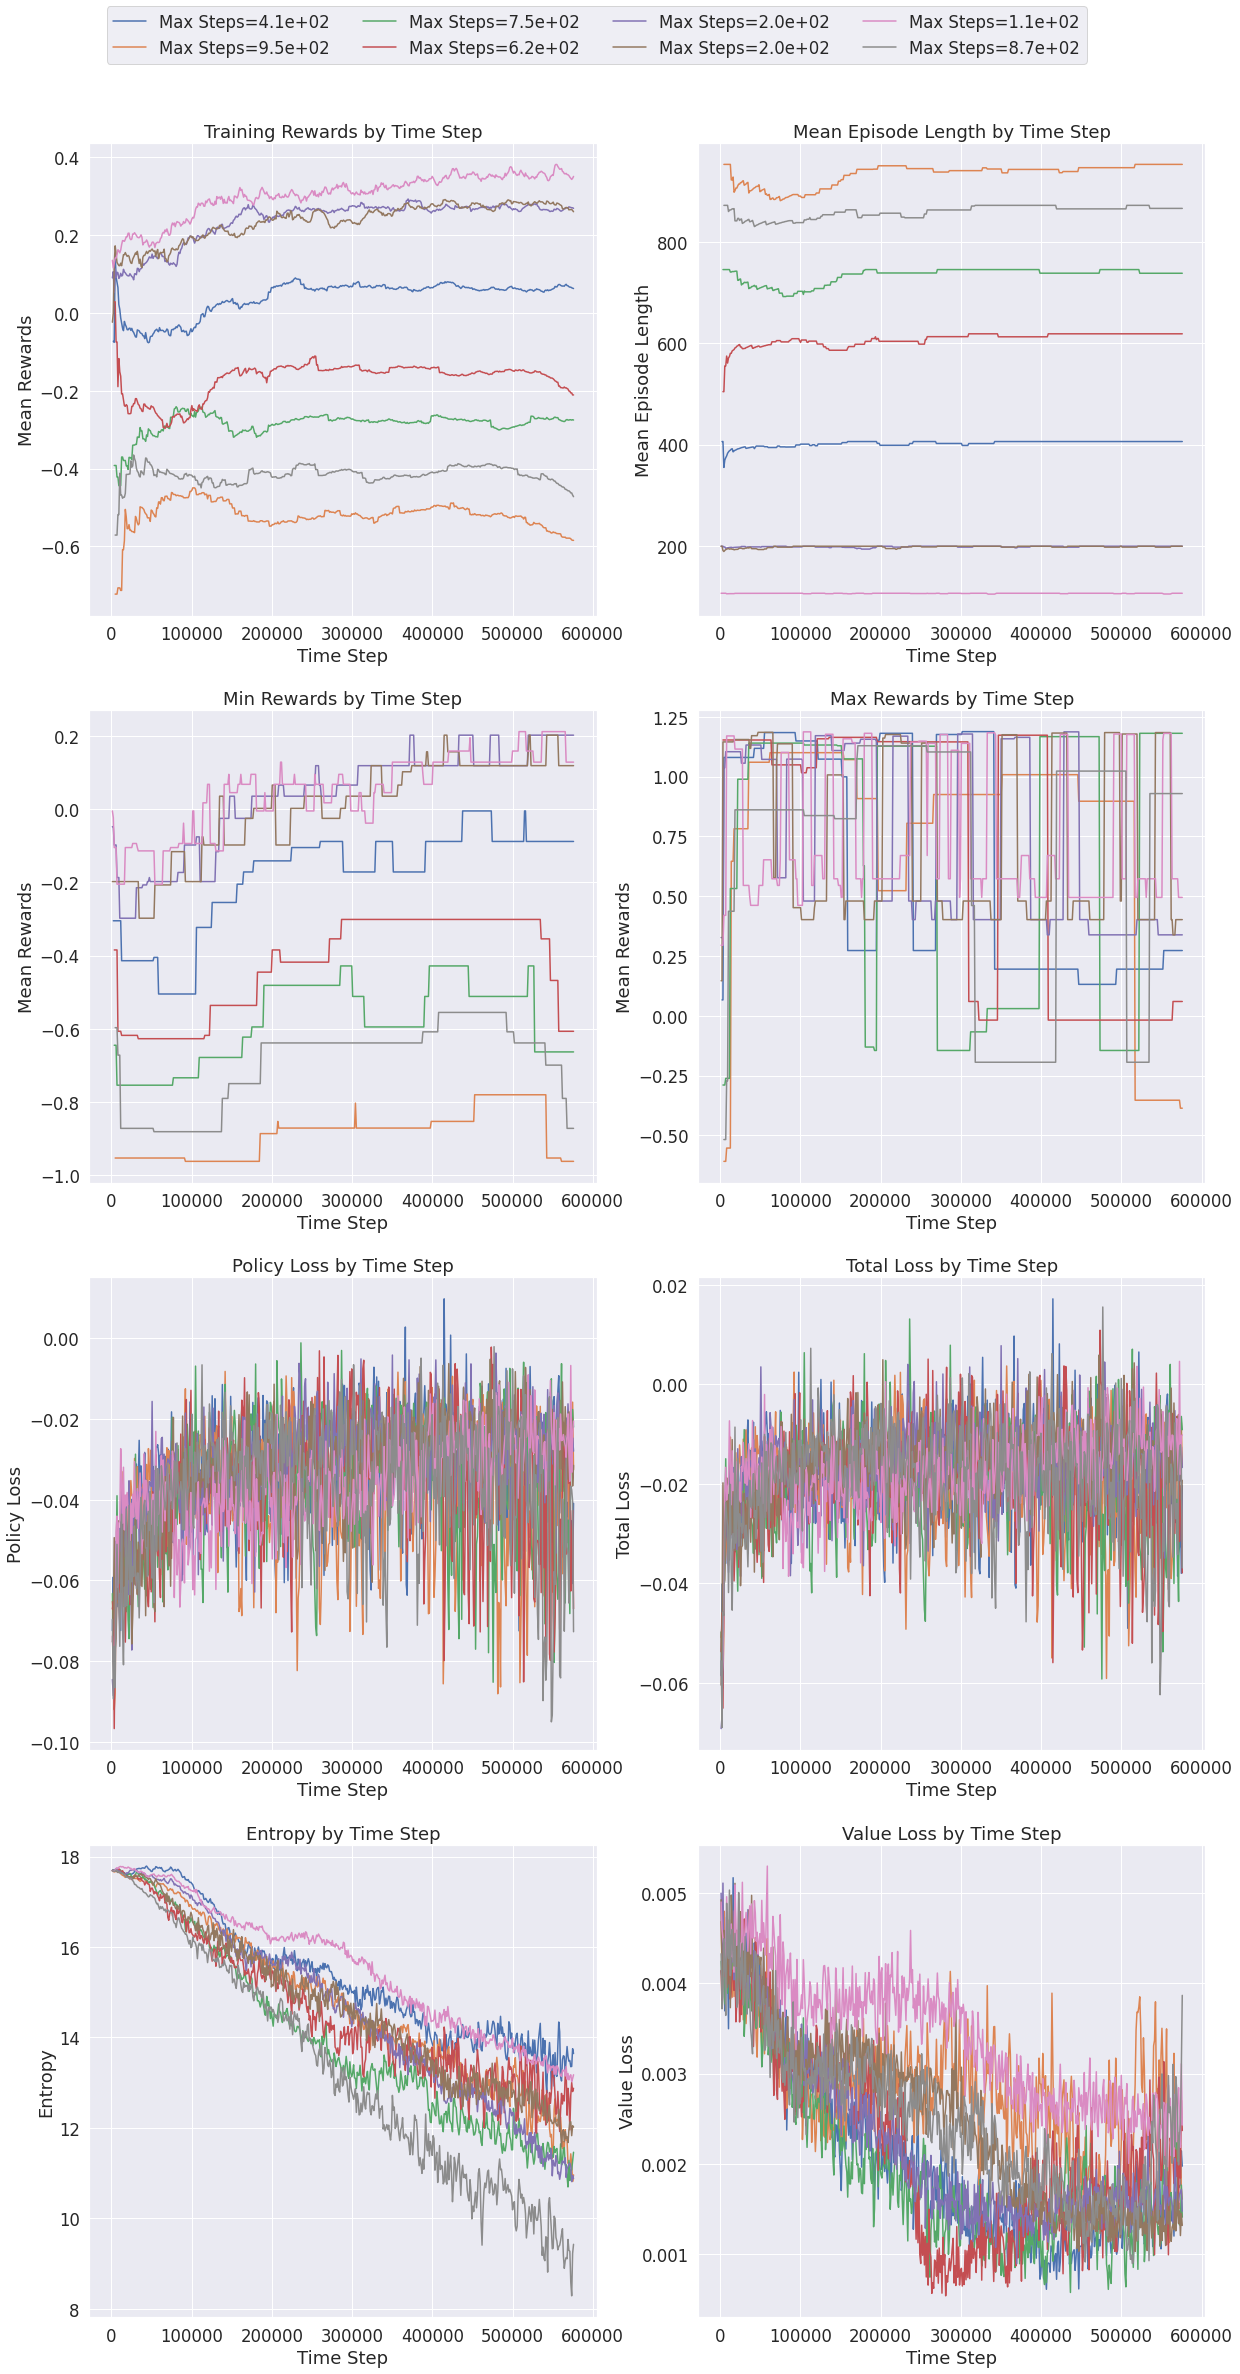

In [168]:
analysis_max_steps_v3 = ExperimentAnalysis('/home/pgcotovio/repos/nclustRL/Exp/test_framework2/basic_config_v3_tunned_maxsteps_hypertune/sample_0/PPO_2022-03-11_01-06-01')

def plot_hypertune_steps(analysis):

        labels = []
        fig, ax = plt.subplots(4, 2, figsize=(20, 40))
        for i, trial in enumerate(analysis.trials):

                

                data = pd.read_csv(trial.logdir + '/progress.csv', on_bad_lines='skip')
                
                # Get labels for legend
                max_steps = format(analysis.trials[i].config['env_config']['max_steps'],'.1e')

                labels.append('Max Steps={}'.format(max_steps))

                sns.lineplot(data=data, x='timesteps_total', y='episode_reward_mean', ci='sd', ax=ax[0, 0])

                sns.lineplot(data=data, x='timesteps_total', y='episode_len_mean', ci='sd', ax=ax[0, 1])

                sns.lineplot(data=data, x='timesteps_total', y='episode_reward_min', ci='sd', ax=ax[1, 0])

                sns.lineplot(data=data, x='timesteps_total', y='episode_reward_max', ci='sd', ax=ax[1, 1])

                sns.lineplot(data=data, x='timesteps_total', y='info/learner/default_policy/learner_stats/total_loss', ci='sd', ax=ax[2, 1])

                sns.lineplot(data=data, x='timesteps_total', y='info/learner/default_policy/learner_stats/policy_loss', ci='sd', ax=ax[2, 0])

                sns.lineplot(data=data, x='timesteps_total', y='info/learner/default_policy/learner_stats/vf_loss', ci='sd', ax=ax[3, 1])

                sns.lineplot(data=data, x='timesteps_total', y='info/learner/default_policy/learner_stats/entropy', ci='sd', ax=ax[3, 0])




        ax[0, 0].set_ylabel('Mean Rewards')
        ax[0, 0].set_title('Training Rewards by Time Step')
        ax[0, 0].legend(labels=labels, loc='lower center',
                ncol=4, bbox_to_anchor=[1, 1.15])
        ax[0, 0].set_xlabel('Time Step')
        ax[0, 1].set_title('Mean Episode Length by Time Step')
        ax[0, 1].set_ylabel('Mean Episode Length')
        ax[0, 1].set_xlabel('Time Step')
        ax[1, 0].set_title('Min Rewards by Time Step')
        ax[1, 0].set_ylabel('Mean Rewards')
        ax[1, 0].set_xlabel('Time Step')
        ax[1, 1].set_title('Max Rewards by Time Step')
        ax[1, 1].set_ylabel('Mean Rewards')
        ax[1, 1].set_xlabel('Time Step')
        ax[2, 1].set_title('Total Loss by Time Step')
        ax[2, 1].set_ylabel('Total Loss')
        ax[2, 1].set_xlabel('Time Step')
        ax[2, 0].set_title('Policy Loss by Time Step')
        ax[2, 0].set_ylabel('Policy Loss')
        ax[2, 0].set_xlabel('Time Step')
        ax[3, 0].set_title('Entropy by Time Step')
        ax[3, 0].set_ylabel('Entropy')
        ax[3, 0].set_xlabel('Time Step')
        ax[3, 1].set_title('Value Loss by Time Step')
        ax[3, 1].set_ylabel('Value Loss')
        ax[3, 1].set_xlabel('Time Step')
        plt.show()

plot_hypertune_steps(analysis=analysis_max_steps_v3)